In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 

In [3]:
data=pd.read_csv(r'C:\Users\Suneetha\python files\PROJECT-2\hotel_reviews.csv',encoding="Latin1")
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
ps=PorterStemmer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suneetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suneetha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
pip install wasabi==0.8.2

In [6]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)

{'’re', 'made', 'latterly', 'it', 'using', 'enough', 'upon', 'any', 'none', 'yourself', 'seem', 'what', 'he', 'below', 'than', 'your', 'keep', 'various', 'cannot', 'therein', 'does', 'within', 'became', 'else', 'nobody', 'sometimes', 'these', 'doing', 'and', 'into', 'was', 'up', 'too', 'last', 'amongst', 'except', 'her', 'around', 'although', 'more', 'again', 'whose', 'thru', "'ll", 'five', 'will', 'since', 'make', 'anyhow', 'yours', 'besides', 'hundred', 'out', 'noone', 'about', 'hence', 'us', 'behind', 'most', 'no', 'though', 'through', 'why', 'of', 'still', 'empty', 'over', 'six', 'at', 'must', 'i', 'top', '’ve', 'whence', 'via', 'you', 'which', 'side', 'go', 'in', 'namely', 'latter', 'get', '‘ve', 'nor', 'onto', 'as', 'on', 'beside', 'hers', 'really', 'before', 'towards', 'yet', 'seemed', 'with', '‘re', 'such', 'do', 'former', 'ca', 'meanwhile', 'here', 'elsewhere', 'say', 'formerly', 'now', 'whole', 'then', 'eight', 'above', 'front', 'something', "'m", 'three', 'each', 'either', '

In [7]:
def text_clean(text):
    text=text.lower()
   
    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)
    
    return text

In [8]:
cleaned_1 = lambda x: text_clean(x)
data["Cleaned_Reviews"]=pd.DataFrame(data.Review.apply(cleaned_1))

In [9]:
Reviews_1=data.copy()
Reviews_1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews_1["Cleaned_Reviews"][6]
Reviews_1.Cleaned_Reviews

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not  experience hotel monaco seattl...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret  time staying charm not  ca n...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside desk staff n...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Cleaned_Reviews, Length: 20491, dtype: object

In [10]:
corpus=[]

In [11]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Suneetha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
for i in range  (0,len(Reviews_1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews_1["Cleaned_Reviews"][i])
    
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)

In [13]:
corpus[6]

'cozy stay rainy city husband spent night monaco early january business trip chance come ridewe booked monte carlo suite proved comfortable longish stay located street building street noise problem view interesting room building look dank alley midsection large office building suite comfortable plenty spread bathroom attractive squeaky clean small comparison generous proportion sitting sleeping area lot comfortable seating option good lighting plenty storage clothing luggage staff friendly efficient housekeeping staff great job pleasant request responded quicklythe location good easy walk pike street market seattle art museum notch shopping dining optionsa positive experience'

In [14]:
data["Cleaned_Review_Lemmatized"]=corpus


In [15]:
#Creating positive wordcloud

from wordcloud import WordCloud
  

In [16]:

with open("positive-words.txt","r") as pos:
    positive = pos.read().split("\n")

(-0.5, 2999.5, 1999.5, -0.5)

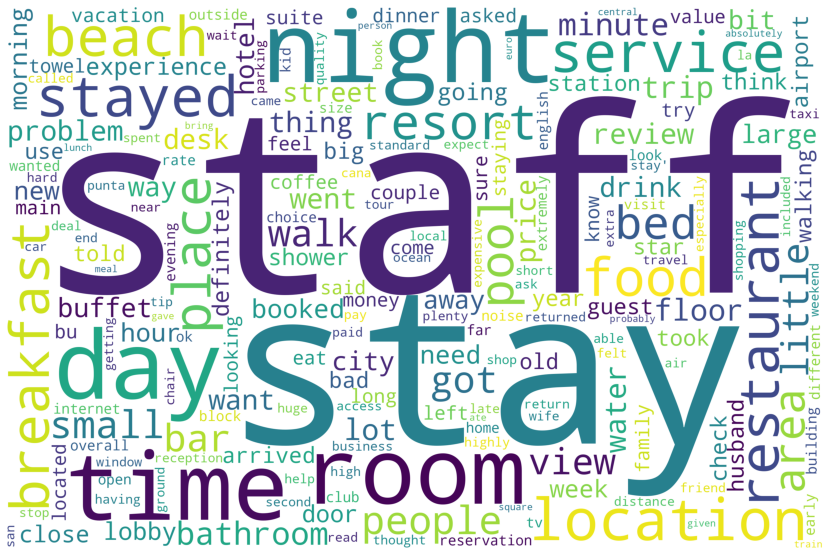

In [17]:
wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='viridis', collocations=False, stopwords=positive).generate(str(corpus ))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud1)
plt.axis('off')


In [18]:
#Creating negative wordcloud

with open("negative-words.txt","r") as neg:
    negative = neg.read().split("\n")


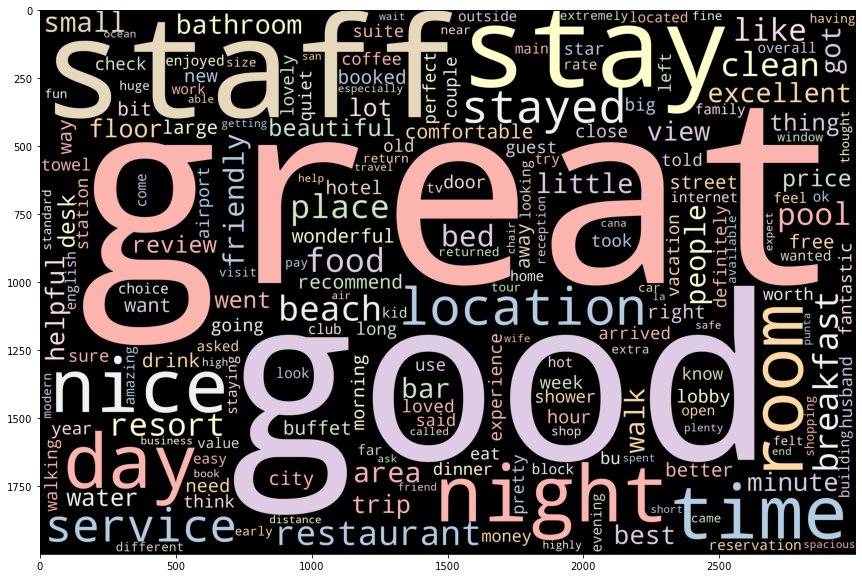

In [19]:
wordcloud_neg = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False,stopwords=negative).generate(str(corpus))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud_neg)


In [20]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [21]:
#Polarity and subjectivity#

import textblob
from textblob import TextBlob

data["Polarity"]=data["Cleaned_Reviews"].apply(lambda x:TextBlob(x).sentiment.polarity)
data["Subjectivity"]=data["Cleaned_Reviews"].apply(lambda x:TextBlob(x).sentiment.subjectivity)


In [22]:
#Printing 5 reviews with highest polarity

print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(data.iloc[data['Polarity'].sort_values(ascending=False)[:5].index]['Cleaned_Reviews']):
    print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 absolutely wonderful wonderful serene oasis city millions steps away times square entering hotel peacefulness eveloping lounge wonderful treat morning afternoon wonderful treated meet travellers business people share experiencesloved  
Review 2:
 best went boxing day  weeks best time food pool staff beach room    kids age   didnt want come homei againloved xx  
Review 3:
 excellent excellent excellent stayed nights start november excellent location excellent staff excellent price  
Review 4:
 number hotel number ranking perfect way best breakfast world  
Review 5:
 did not disappoint superb hotel needs lifts elevators prefer smiles staff hong kong inspired pastry chefs poached hyatt make heavenly  


In [23]:
#Printing 5 reviews with negative polarity

print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(data.iloc[data['Polarity'].sort_values(ascending=True)[:5].index]['Cleaned_Reviews']):
  print('Review {}:\n'.format(index+1),review)   

5 Random Reviews with Lowest Polarity:
Review 1:
 worst location does say place eat sub place make order bullet proof glass  
Review 2:
 not stay stayed group people  person ceiling bathroom fell rooms dirty musty overpriced pina colada no rum  service terrible check charged maid gratuity bell man gratuity absolutely terrible place  
Review 3:
 frontdesk extremely bad service checkin onebedroom sept stay  months people desk horrible not answer calls guest room request items received requested bowl  days reminding morning evening bowl turn upthe desk said conclusion dont trust  
Review 4:
 worst worst hotel experiences life moment wife walked knew trouble carpet filthy odor lobby switched room odor room got gum stains carpet not mention stains bed spreadsimply horrible  
Review 5:
 greta london base stayed london bridge march impresses hotel point view location staff accomodationi recommend highyl anybody going london weekend  


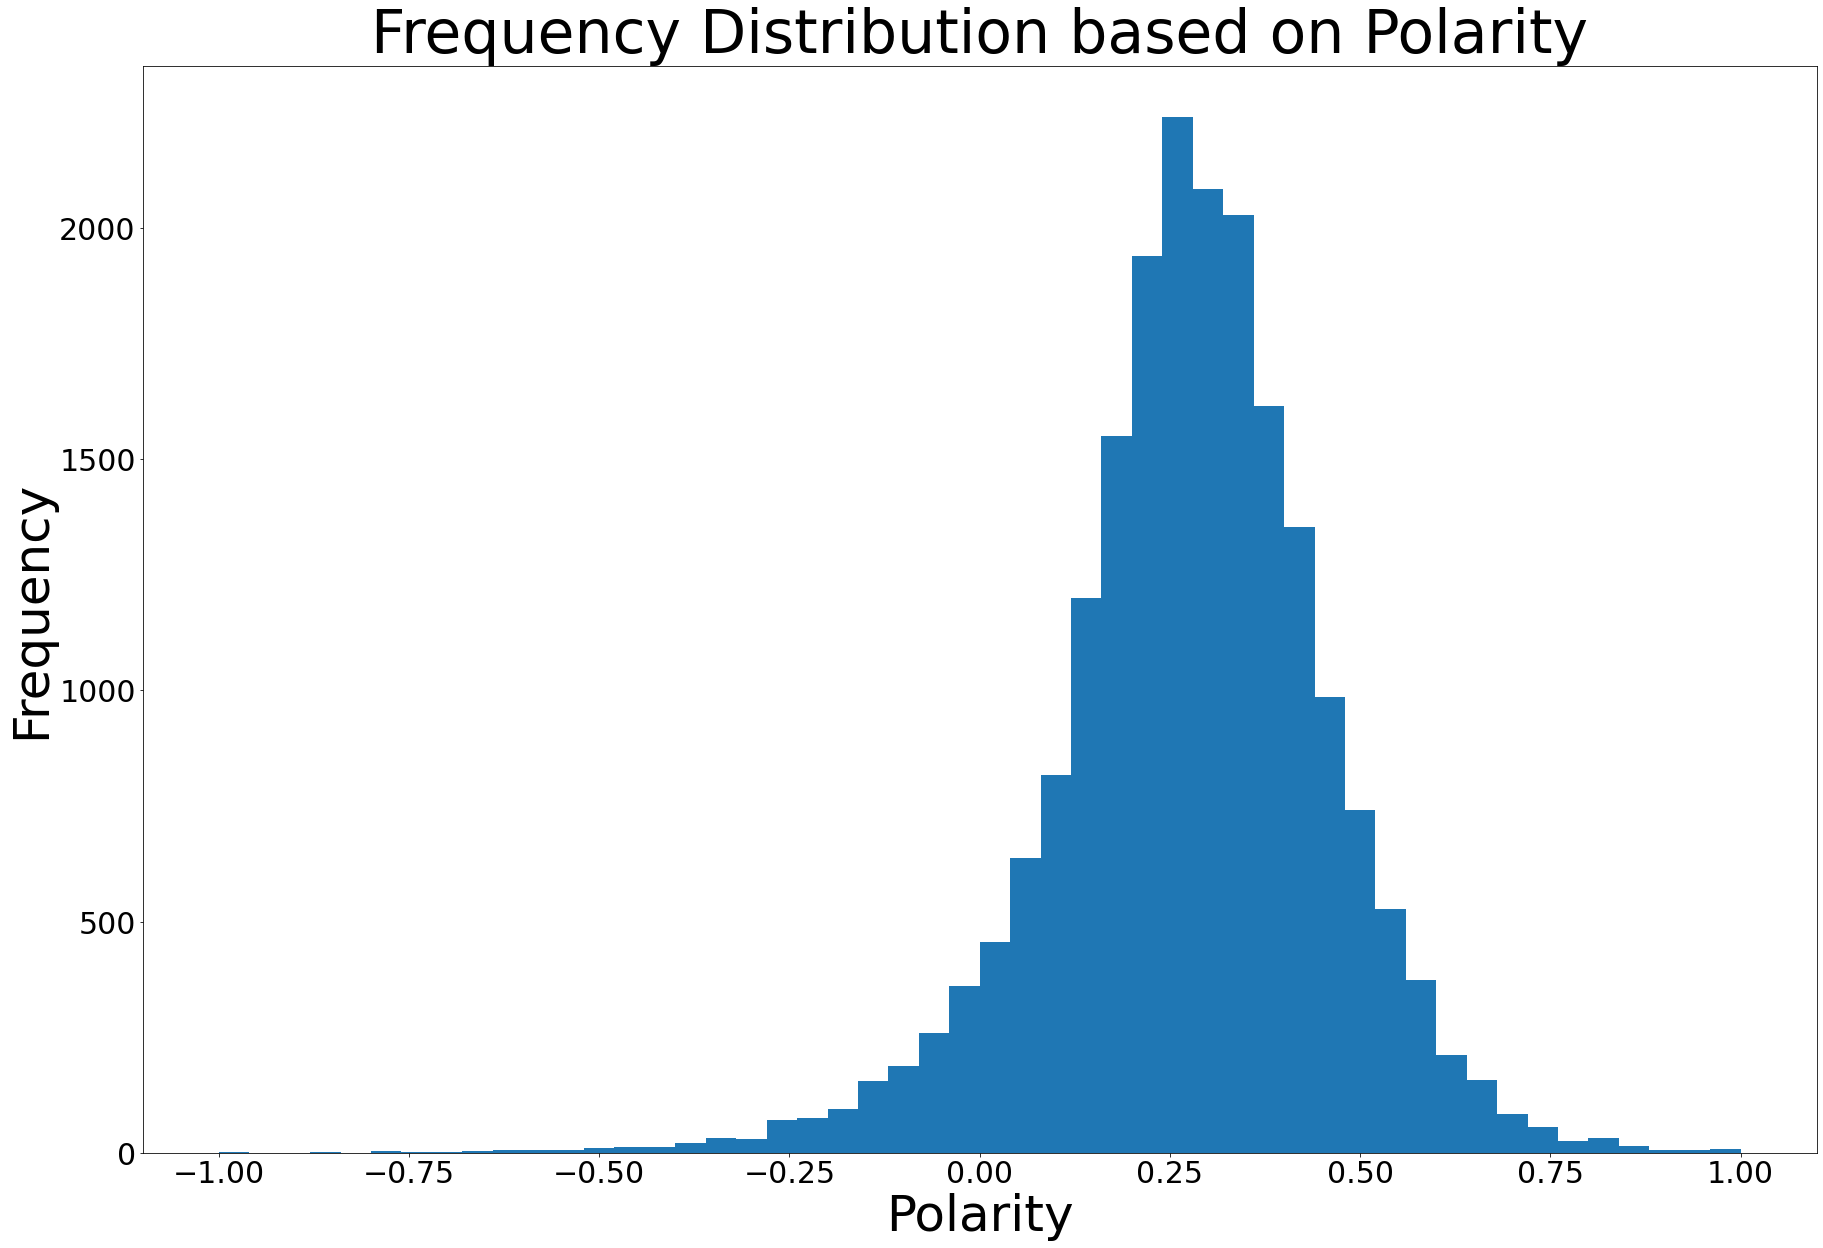

In [24]:
#Frequency Distribution based on Polarity

plt.figure(figsize=(30,20),edgecolor="black")
plt.margins(0.05)
plt.xlabel("Polarity",fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel("Frequency",fontsize=50)
plt.yticks(fontsize=30)
plt.hist(data["Polarity"],bins=50)
plt.title("Frequency Distribution based on Polarity",fontsize=60)
plt.show()

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='Rating'>

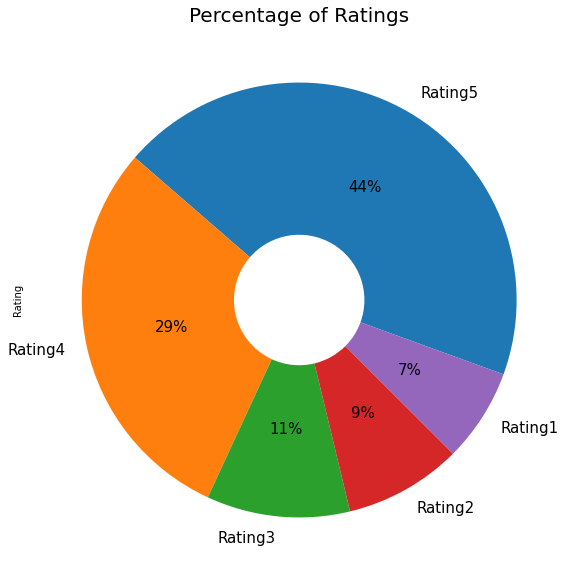

In [25]:
#Pie plot of percentage of ratings

plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
data.Rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})


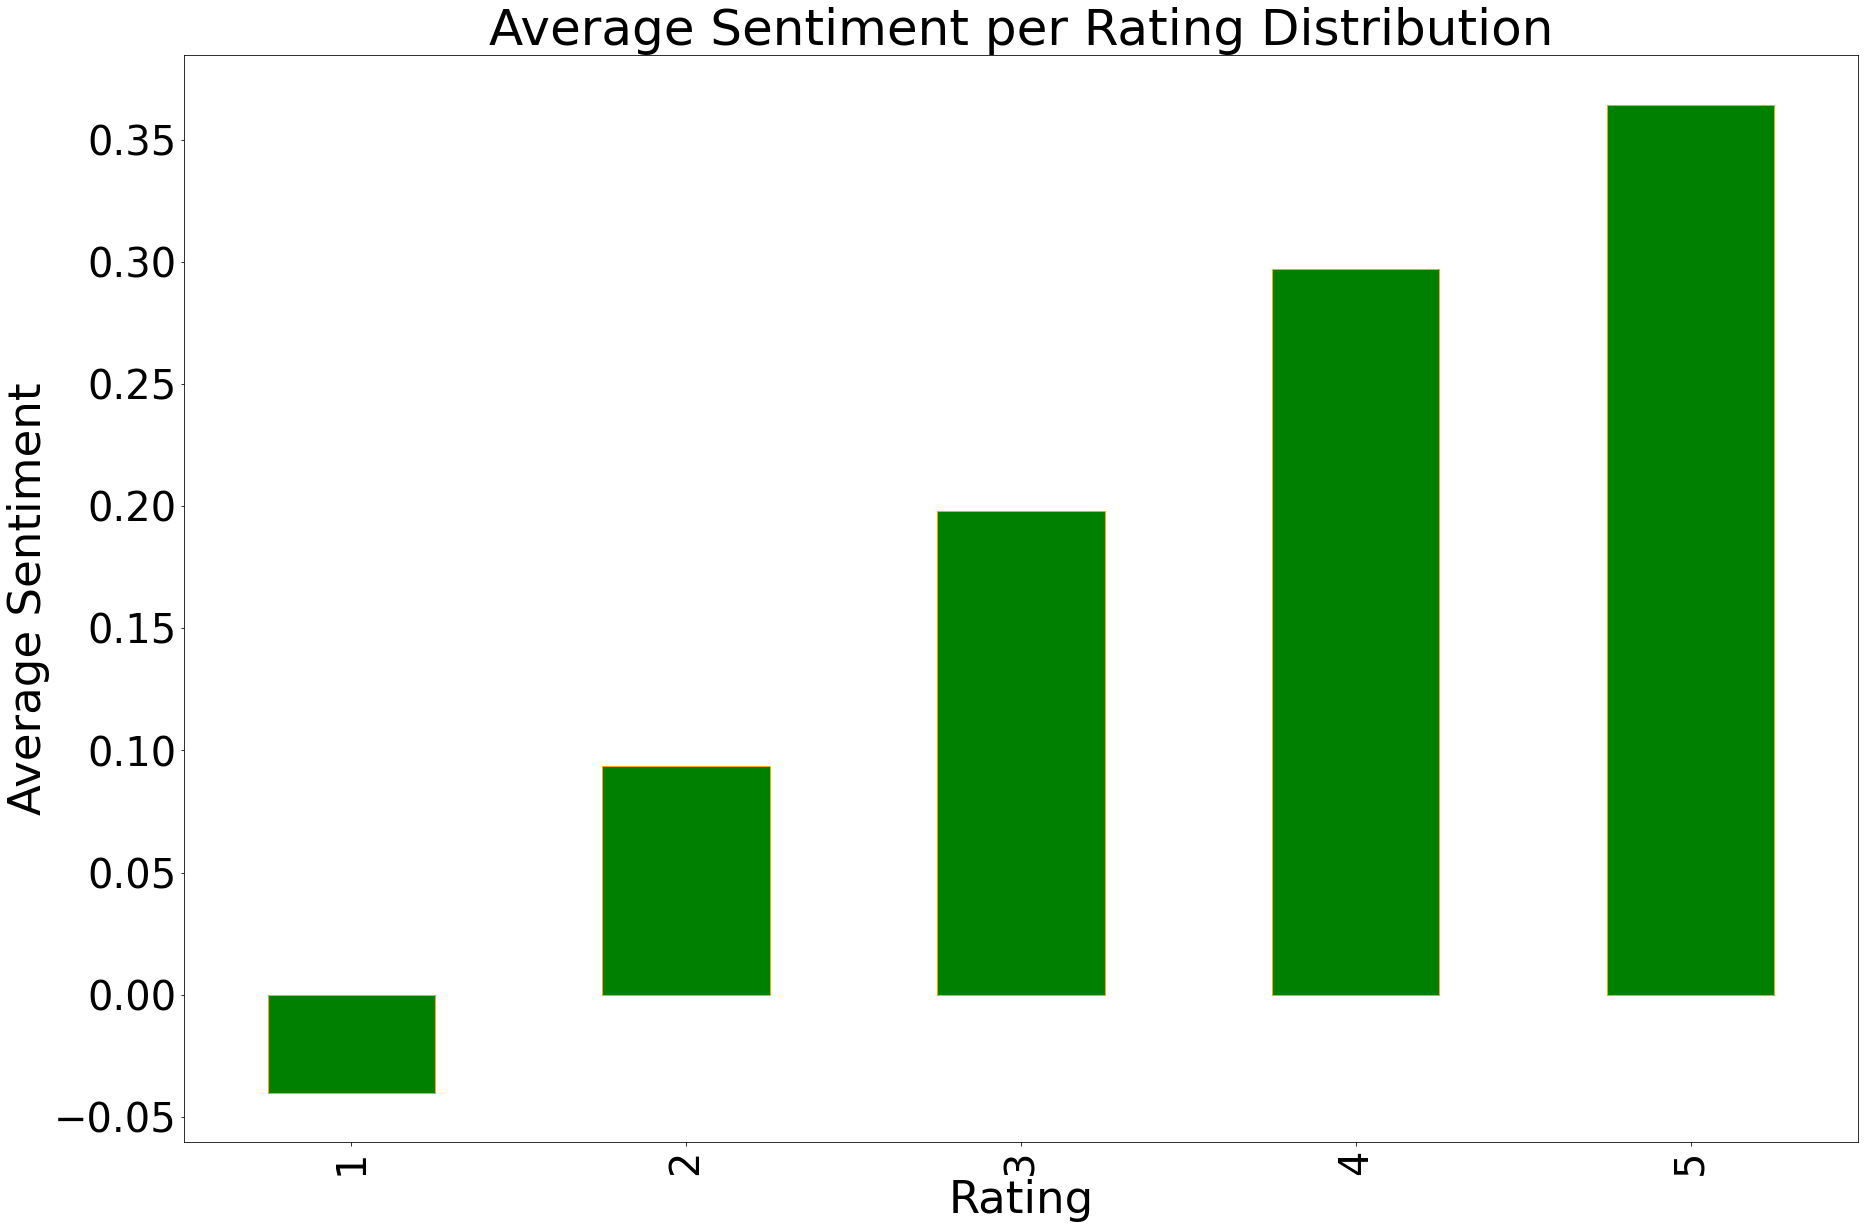

In [26]:
#Sentiment distribution based on ratings

polarity_avg = data.groupby('Rating')['Polarity'].mean().plot(kind='bar', figsize=(30,20),color="green",edgecolor="orange")
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [27]:
#Counting no of words in each review

data["Word Count"]=data["Cleaned_Review_Lemmatized"].apply(lambda x:len(str(x).split()))

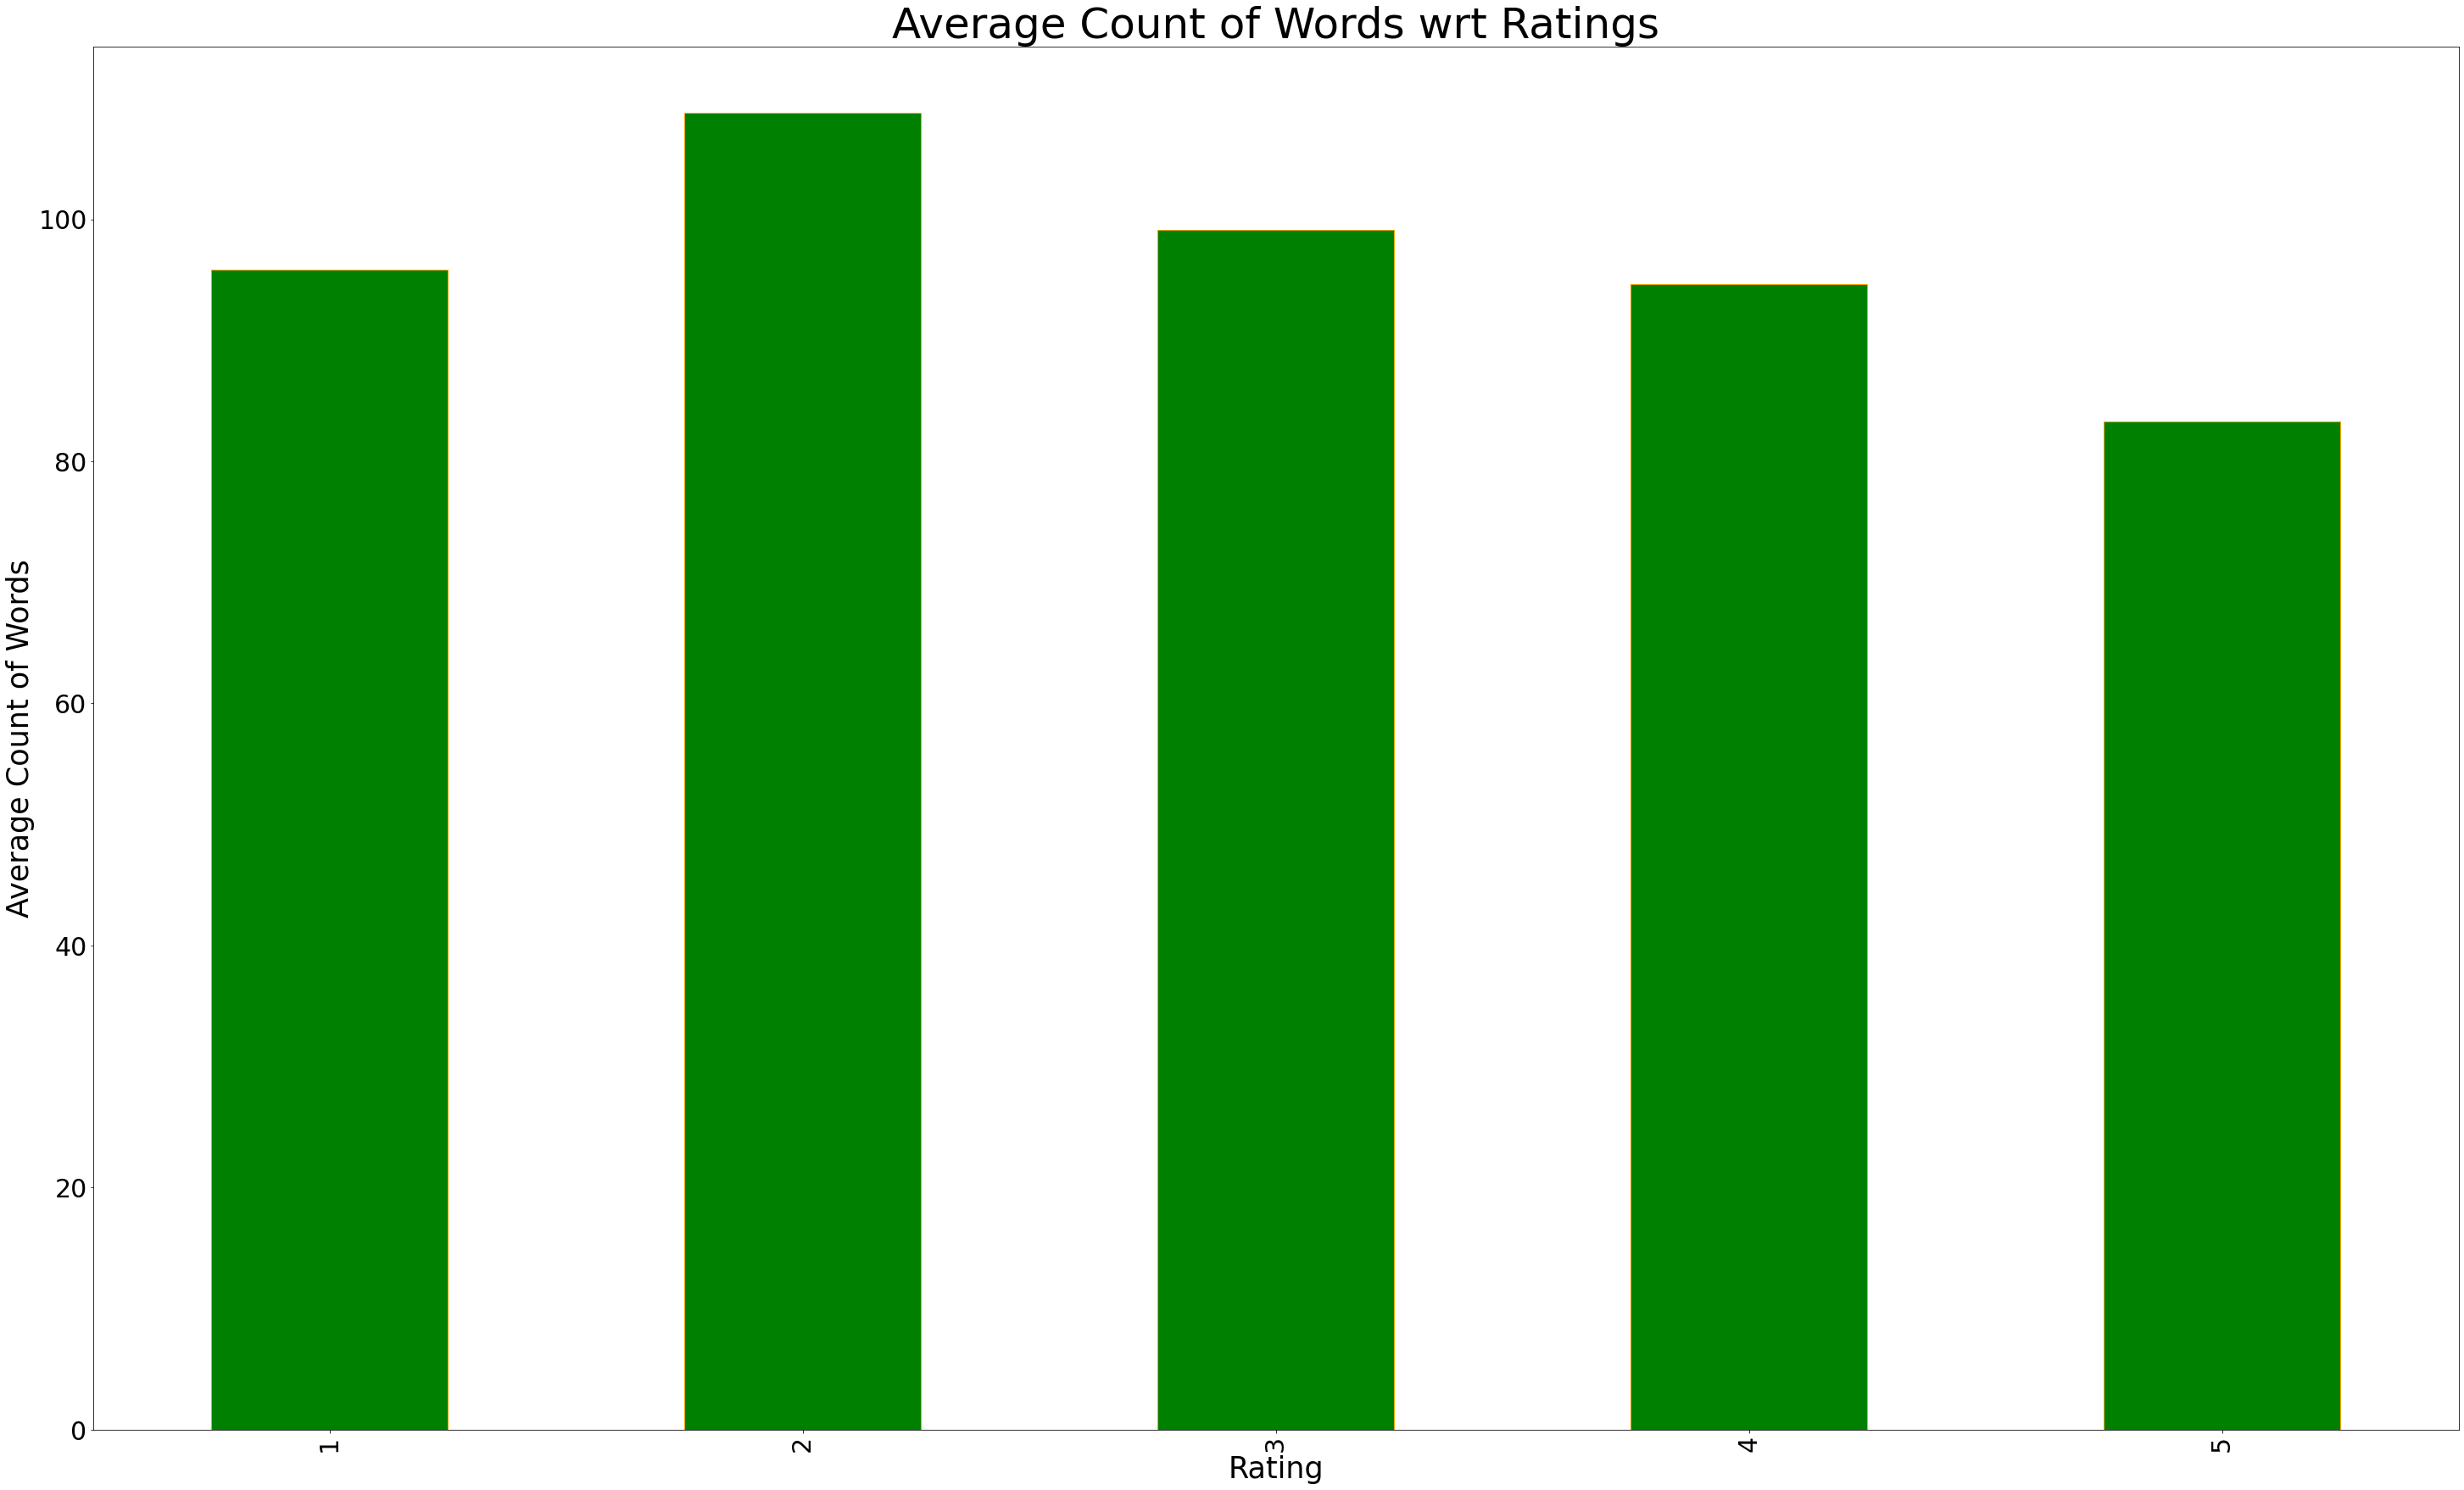

In [28]:
#Average no of words wrt ratings

word_avg=data.groupby("Rating")["Word Count"].mean().plot(kind="bar",figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating',fontsize=35)
plt.ylabel("Average Count of Words",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Average Count of Words wrt Ratings",fontsize=50)
plt.show()

In [29]:
#Counting no of letters in each review

data['review_len'] = data['Cleaned_Review_Lemmatized'].astype(str).apply(len)

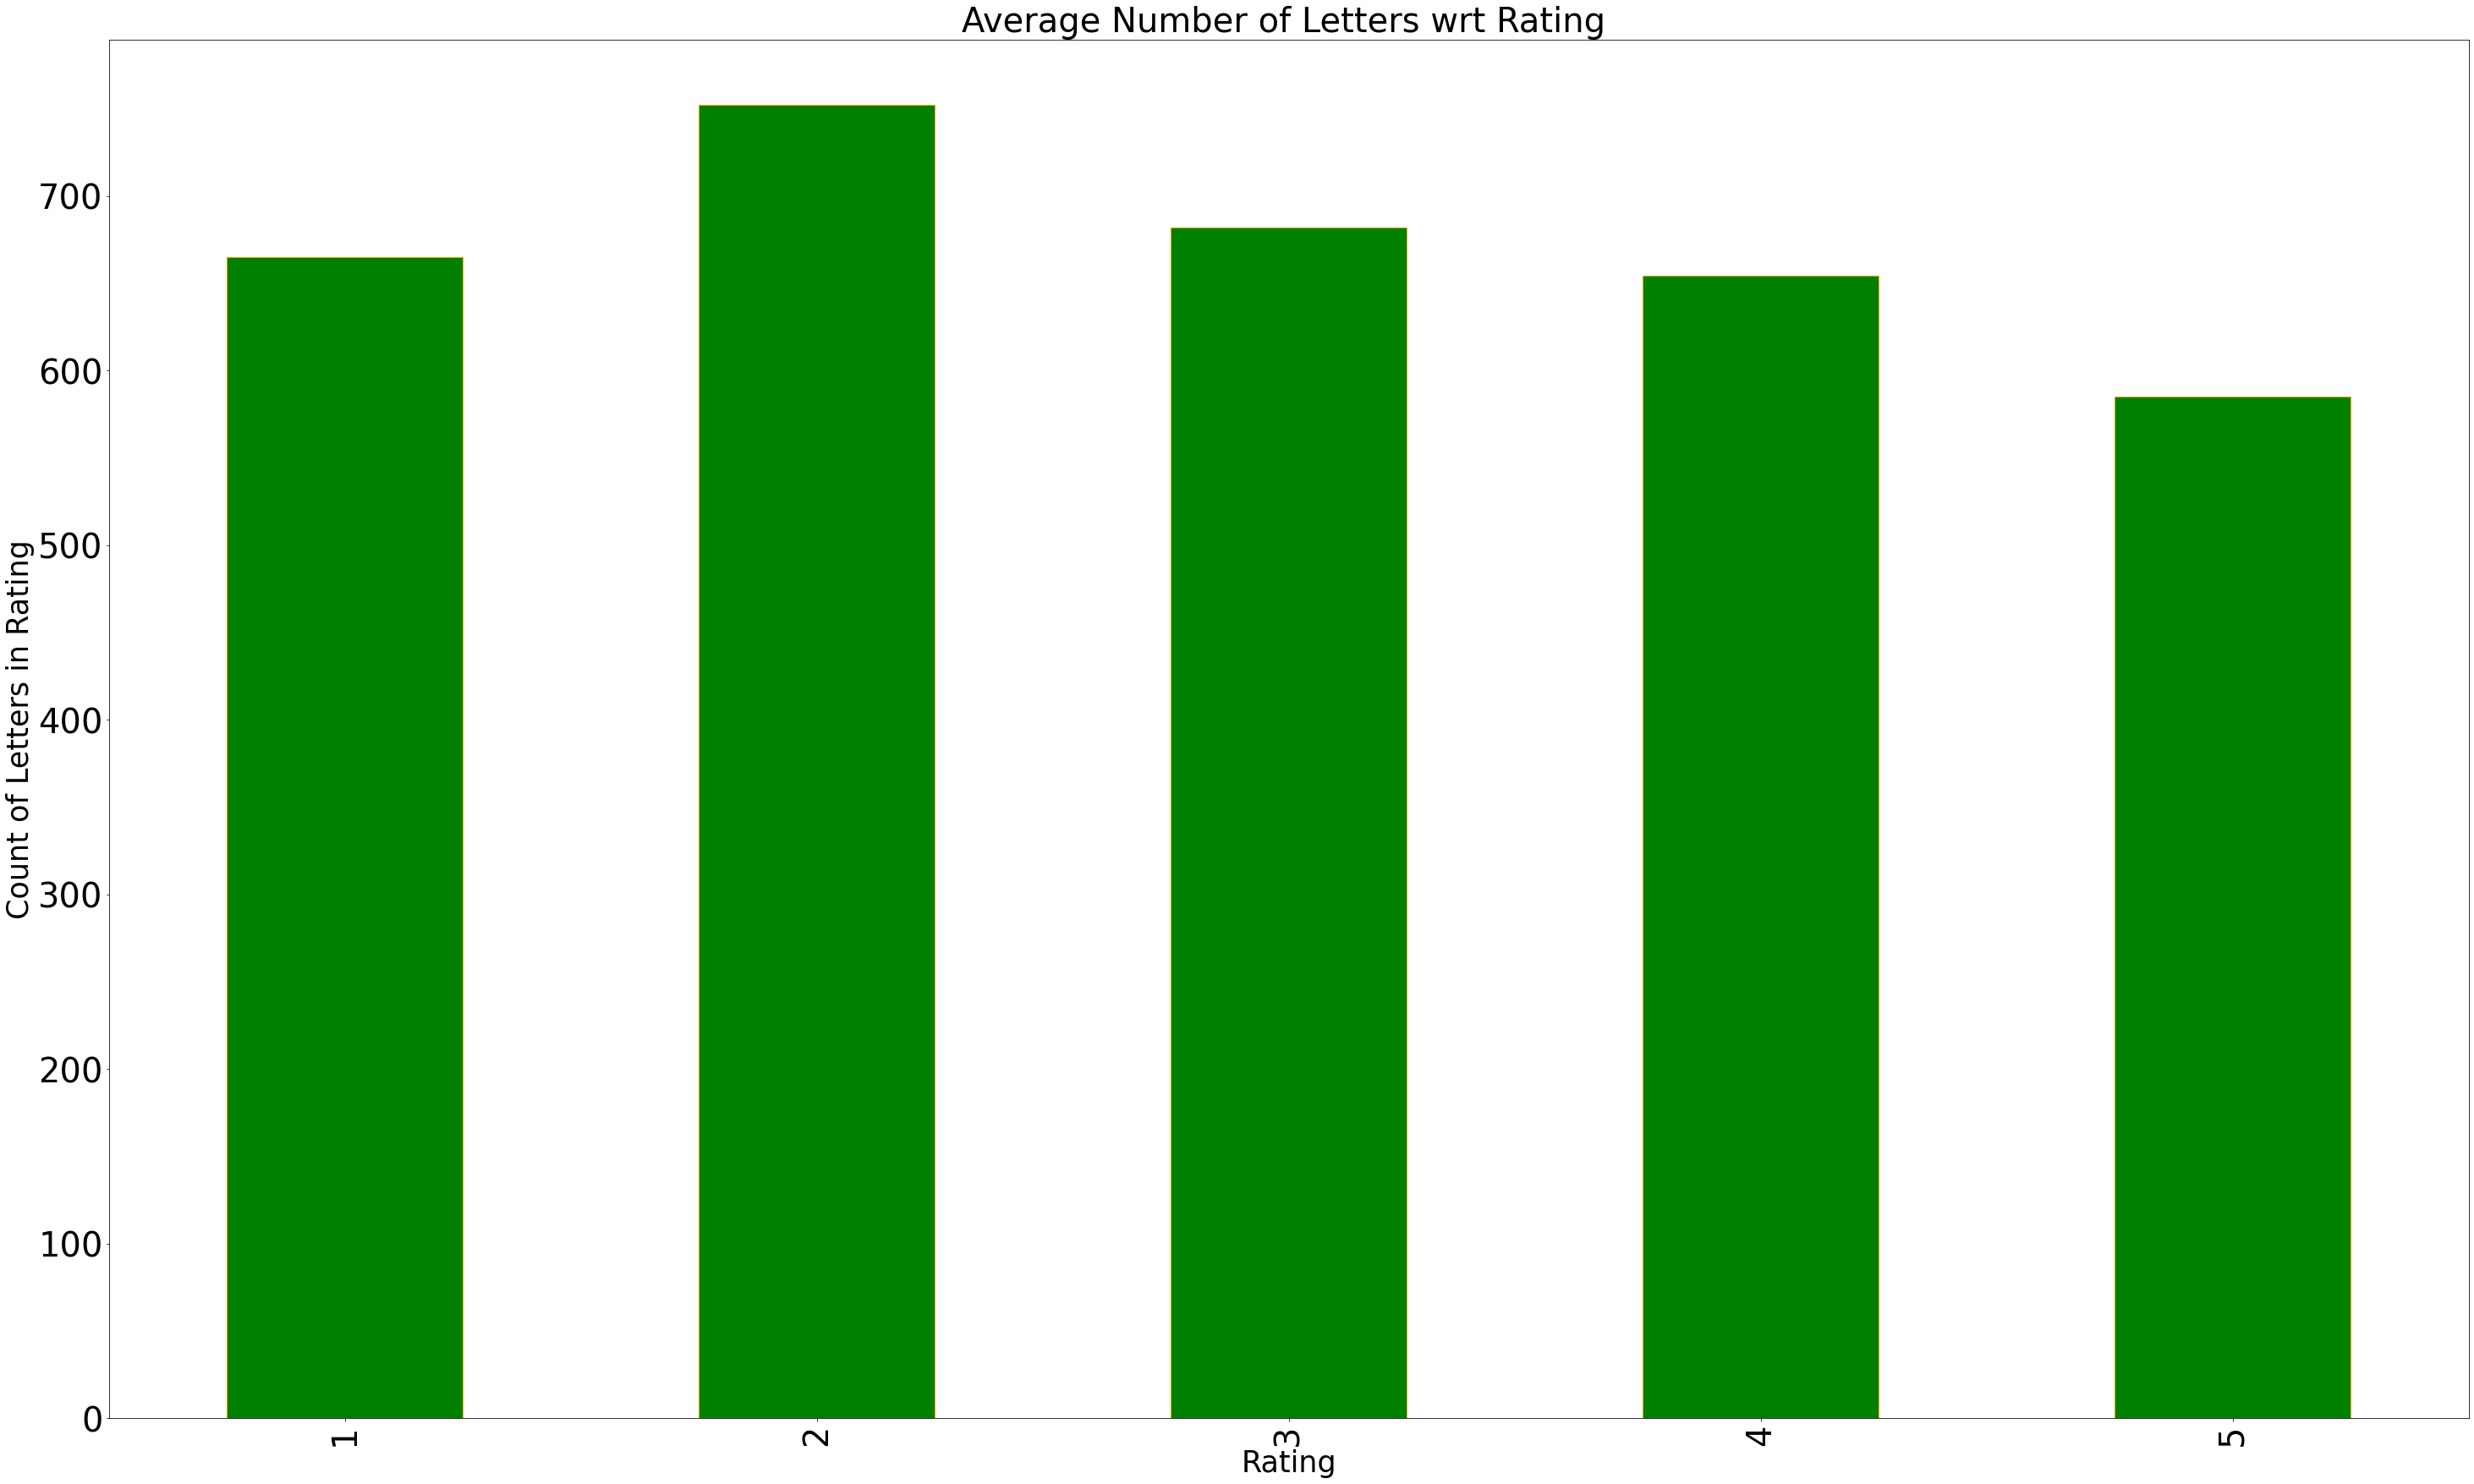

In [30]:
#Average no of letters wrt ratings

letter_avg = data.groupby('Rating')['review_len'].mean().plot(kind='bar', figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters wrt Rating ', fontsize=40)
plt.show()


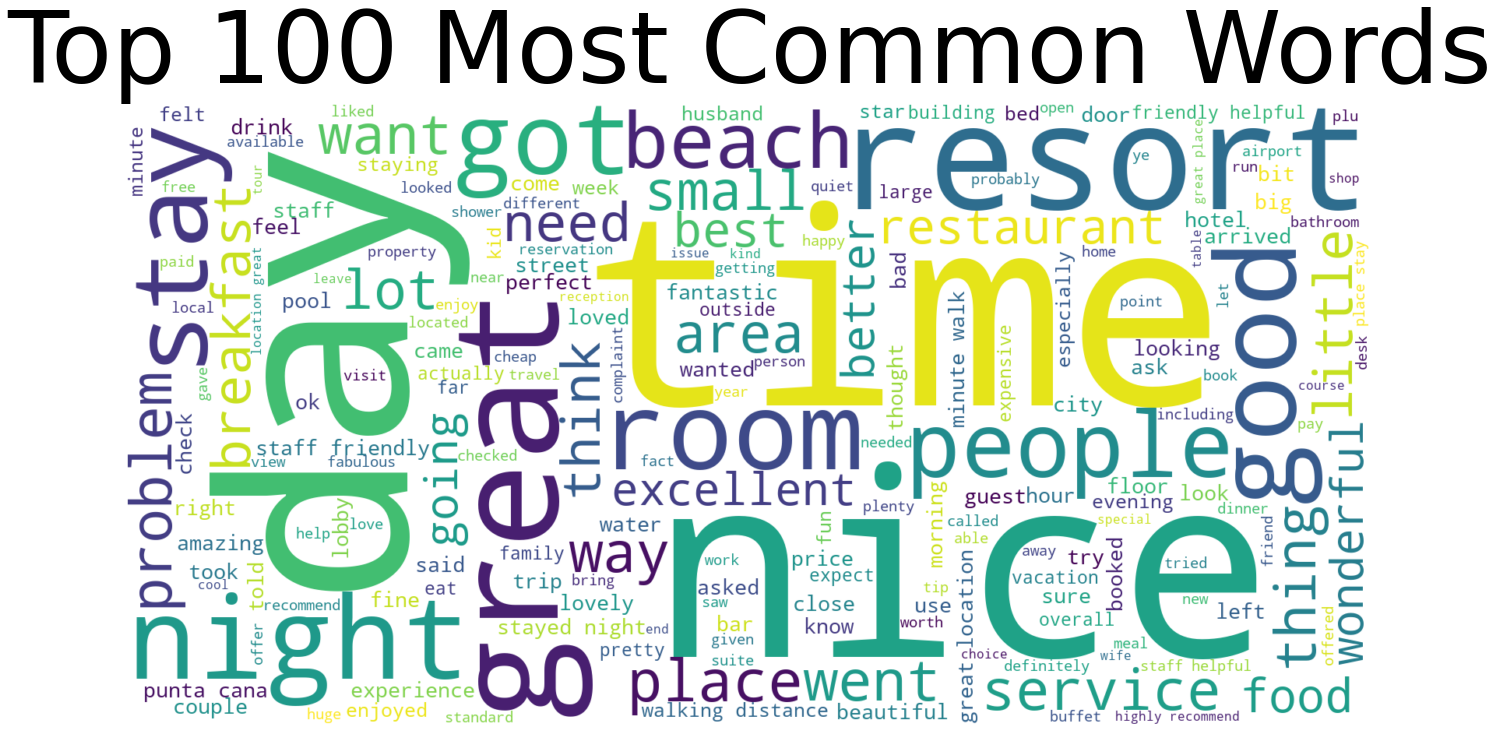

In [31]:
#Counting 100 most common words in our data

from nltk.probability import FreqDist
mostcommon = FreqDist(data["Cleaned_Review_Lemmatized"]).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(corpus))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()


In [32]:
polarity_positive_data=pd.DataFrame(data.groupby("Cleaned_Reviews")["Polarity"].mean().sort_values(ascending=True))


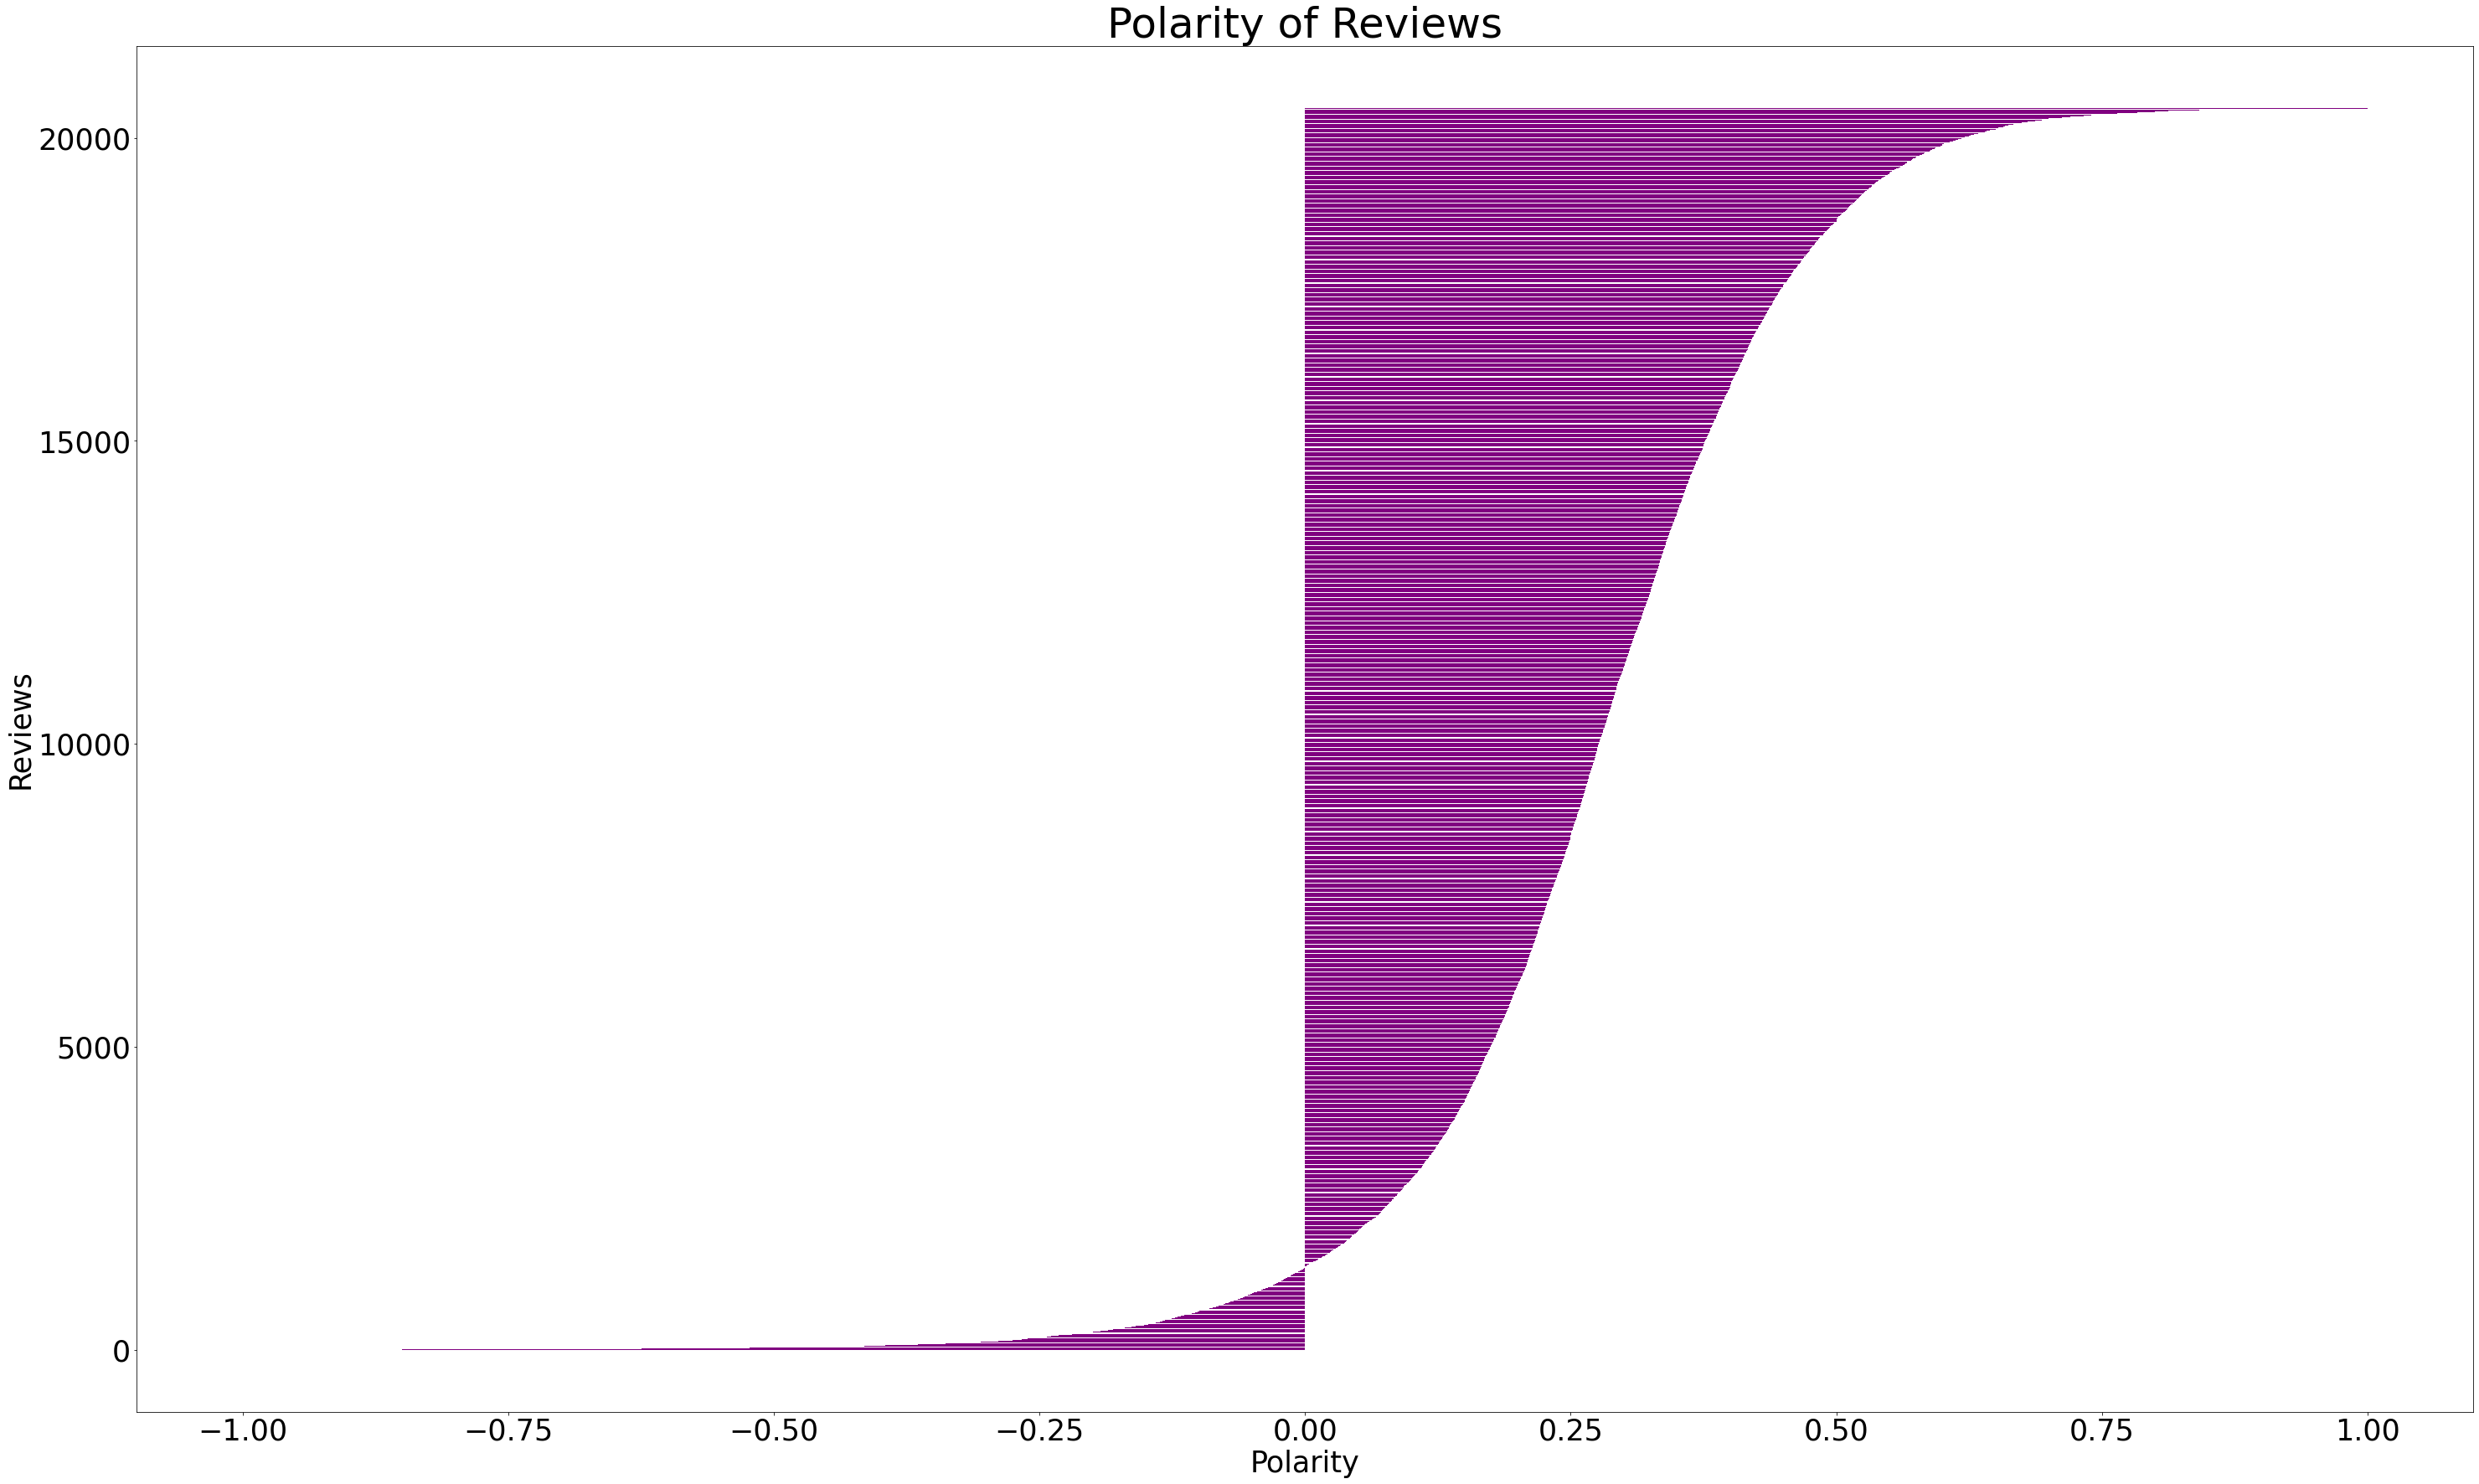

In [33]:
plt.figure(figsize=(50,30))
plt.xlabel('Polarity',fontsize=35)
plt.ylabel('Reviews',fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.title('Polarity of Reviews',fontsize=50)
polarity_graph=plt.barh(np.arange(len(polarity_positive_data.index)),polarity_positive_data['Polarity'],color='purple',)



In [34]:
#categorizing reviews in positive,negative and neutral#

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

In [35]:
data['polarity_score']=data['Polarity'].\
   map(lambda x: sentiment(x))

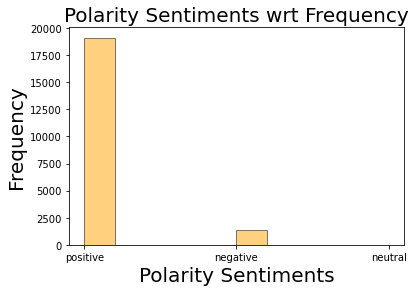

In [36]:
plt.hist(data["polarity_score"],bins=10, color='orange', alpha=0.5, label='Value', edgecolor='black', linewidth=1)
plt.xlabel("Polarity Sentiments",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Polarity Sentiments wrt Frequency",fontsize= 20)
plt.show()

In [37]:
from collections import Counter


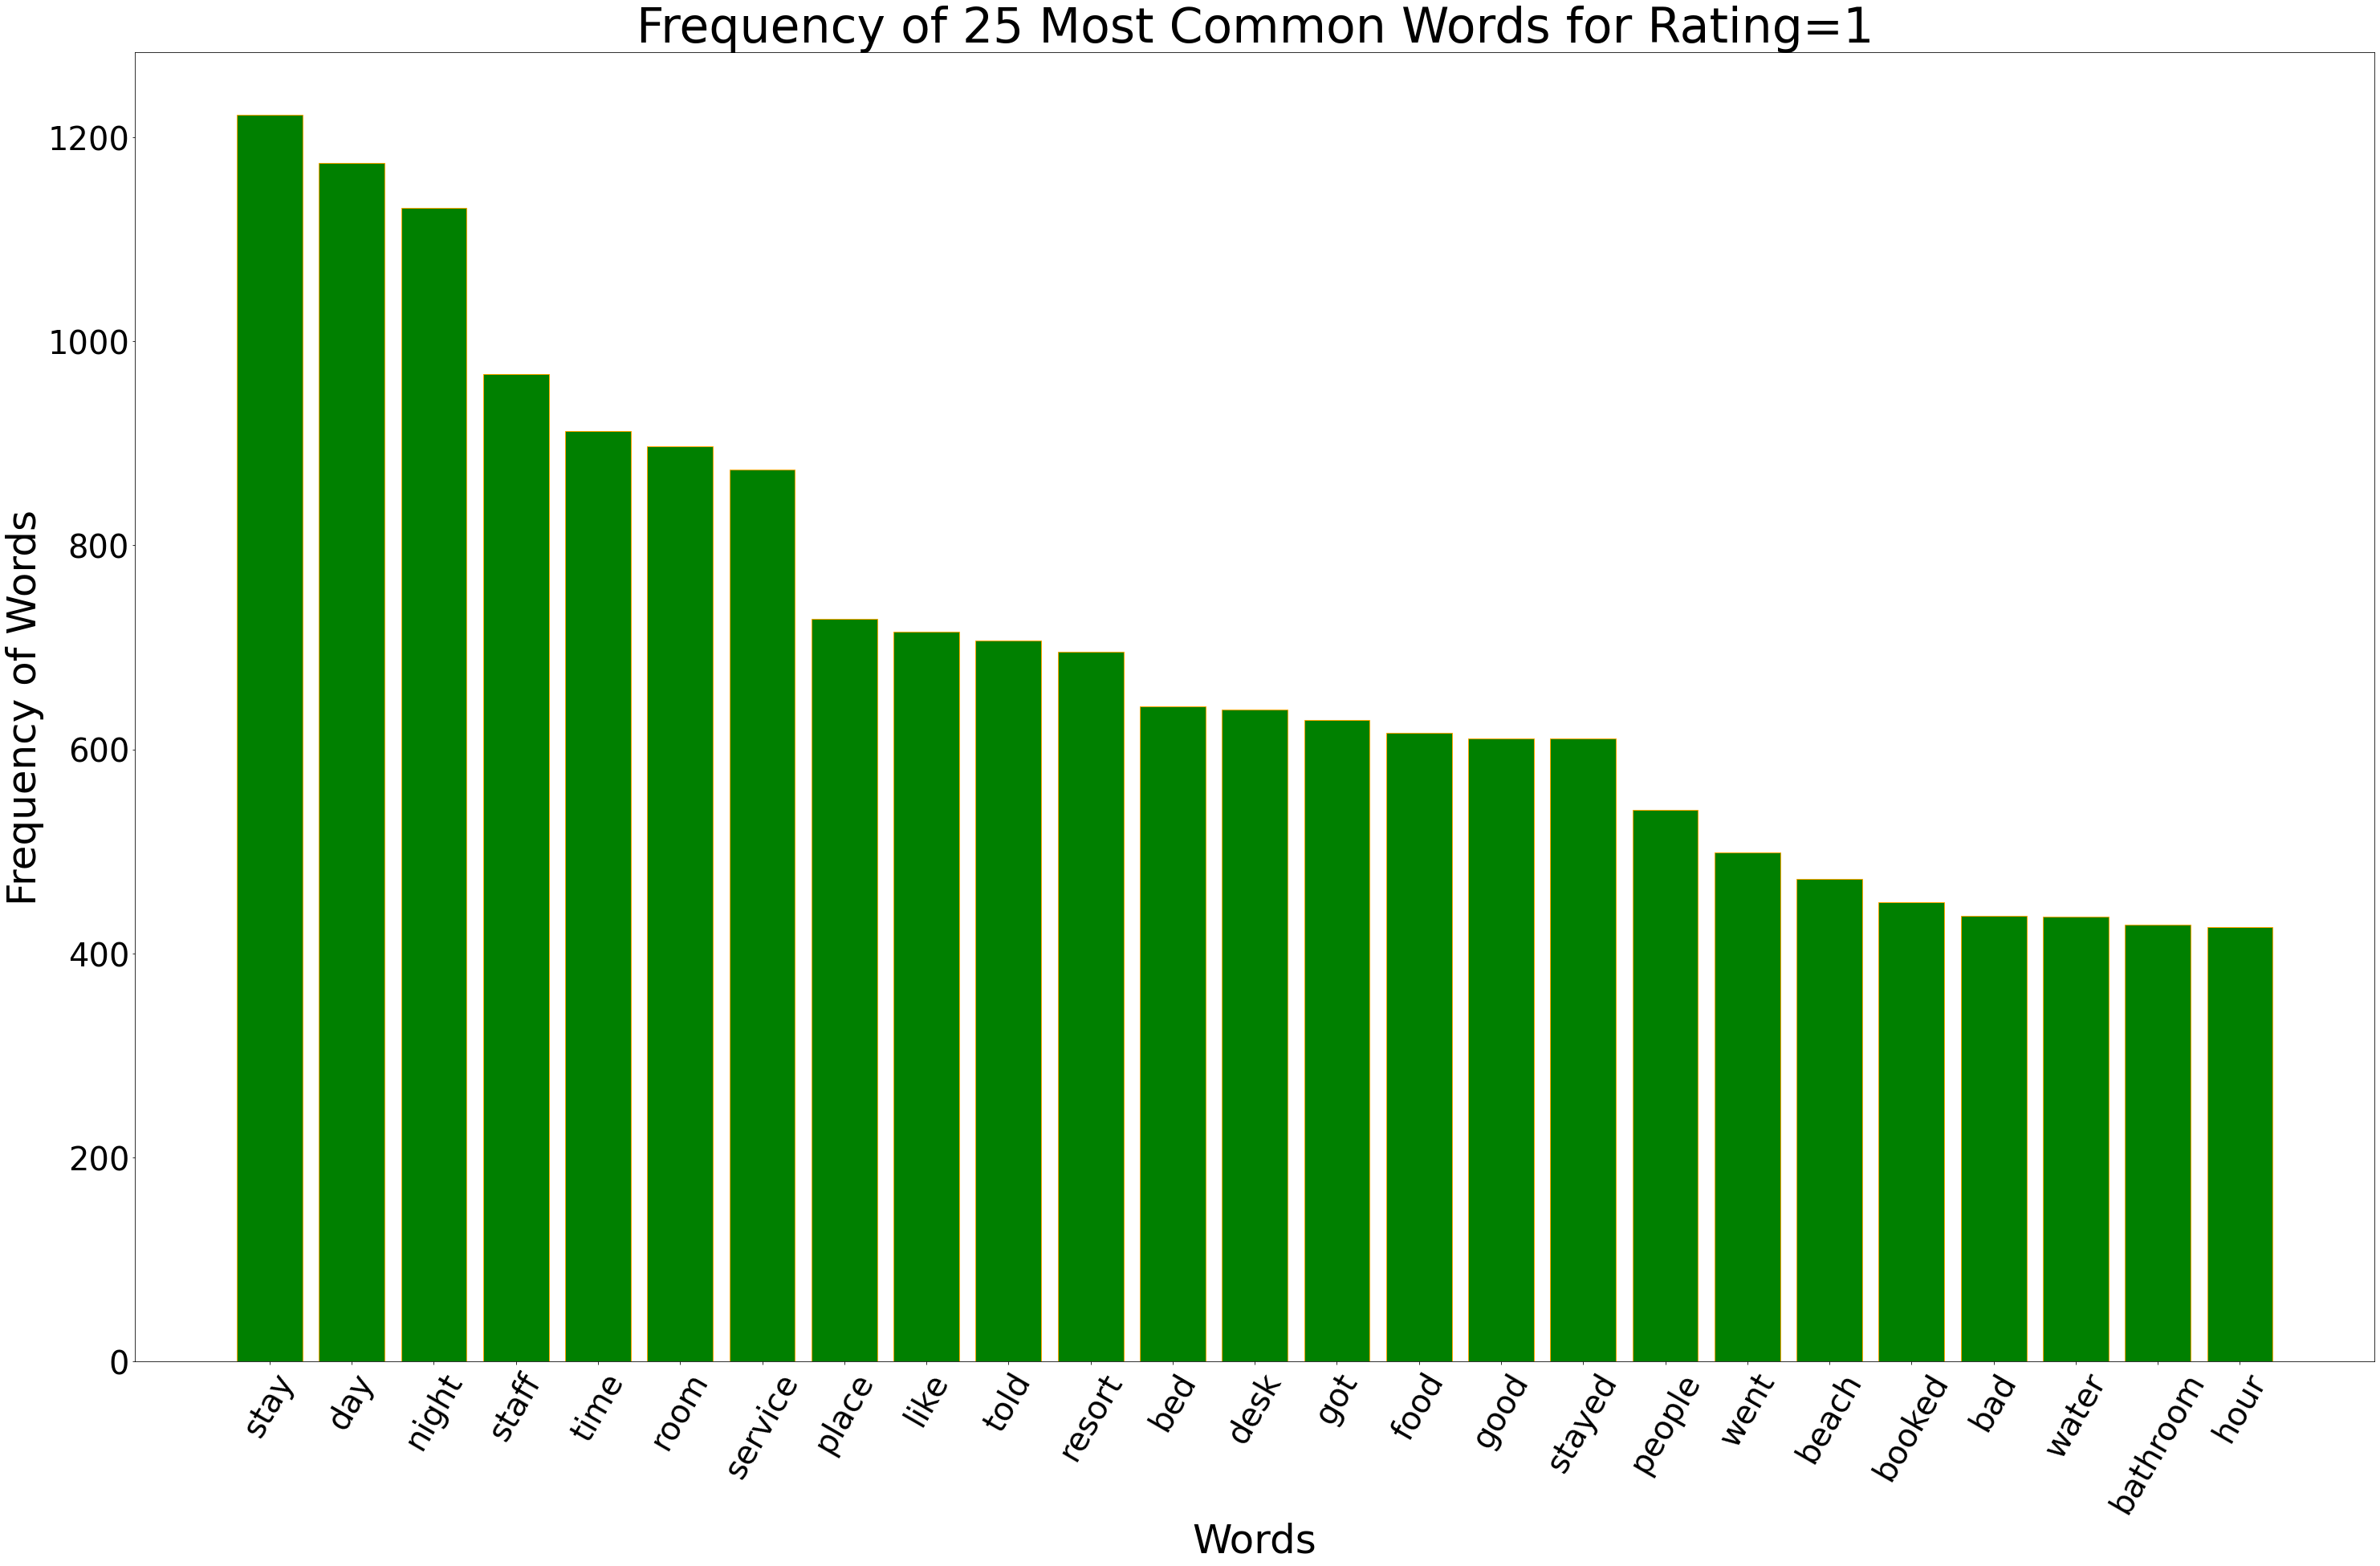

In [38]:
#Most frequent words for rating 1

group_by = data.groupby('Rating')['Cleaned_Review_Lemmatized'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

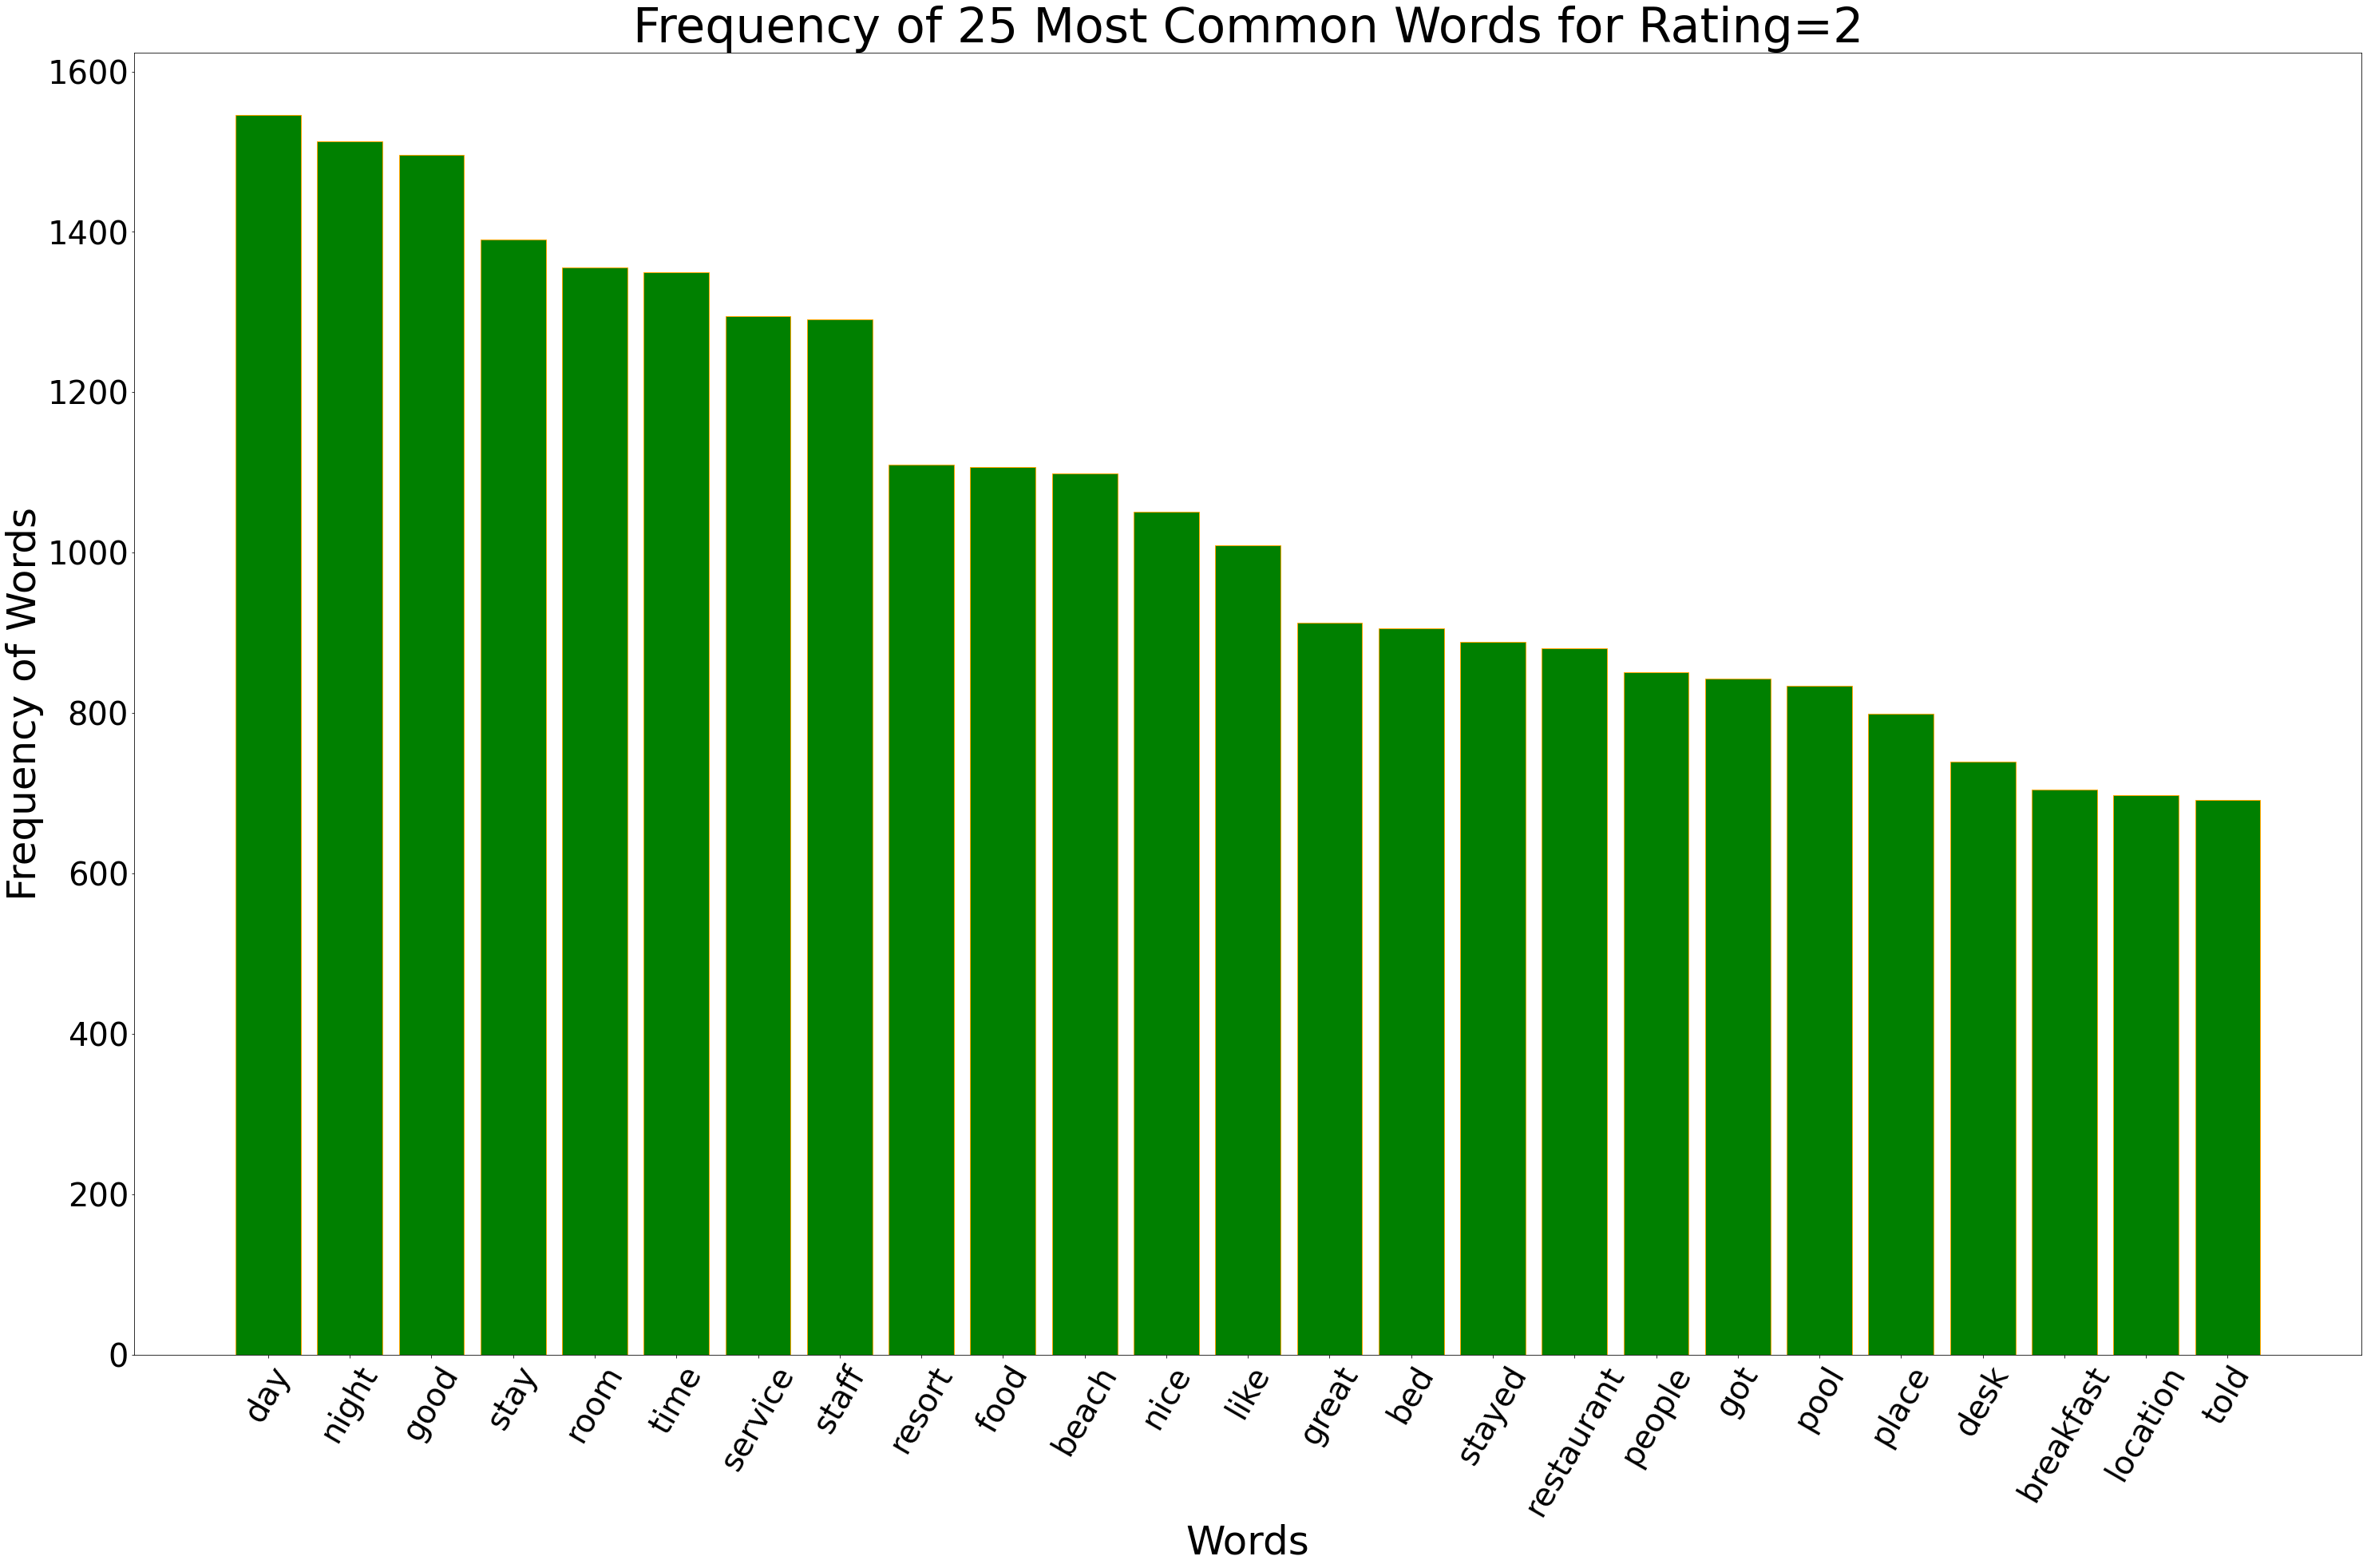

In [39]:
#Most frequent words for rating 2

group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()

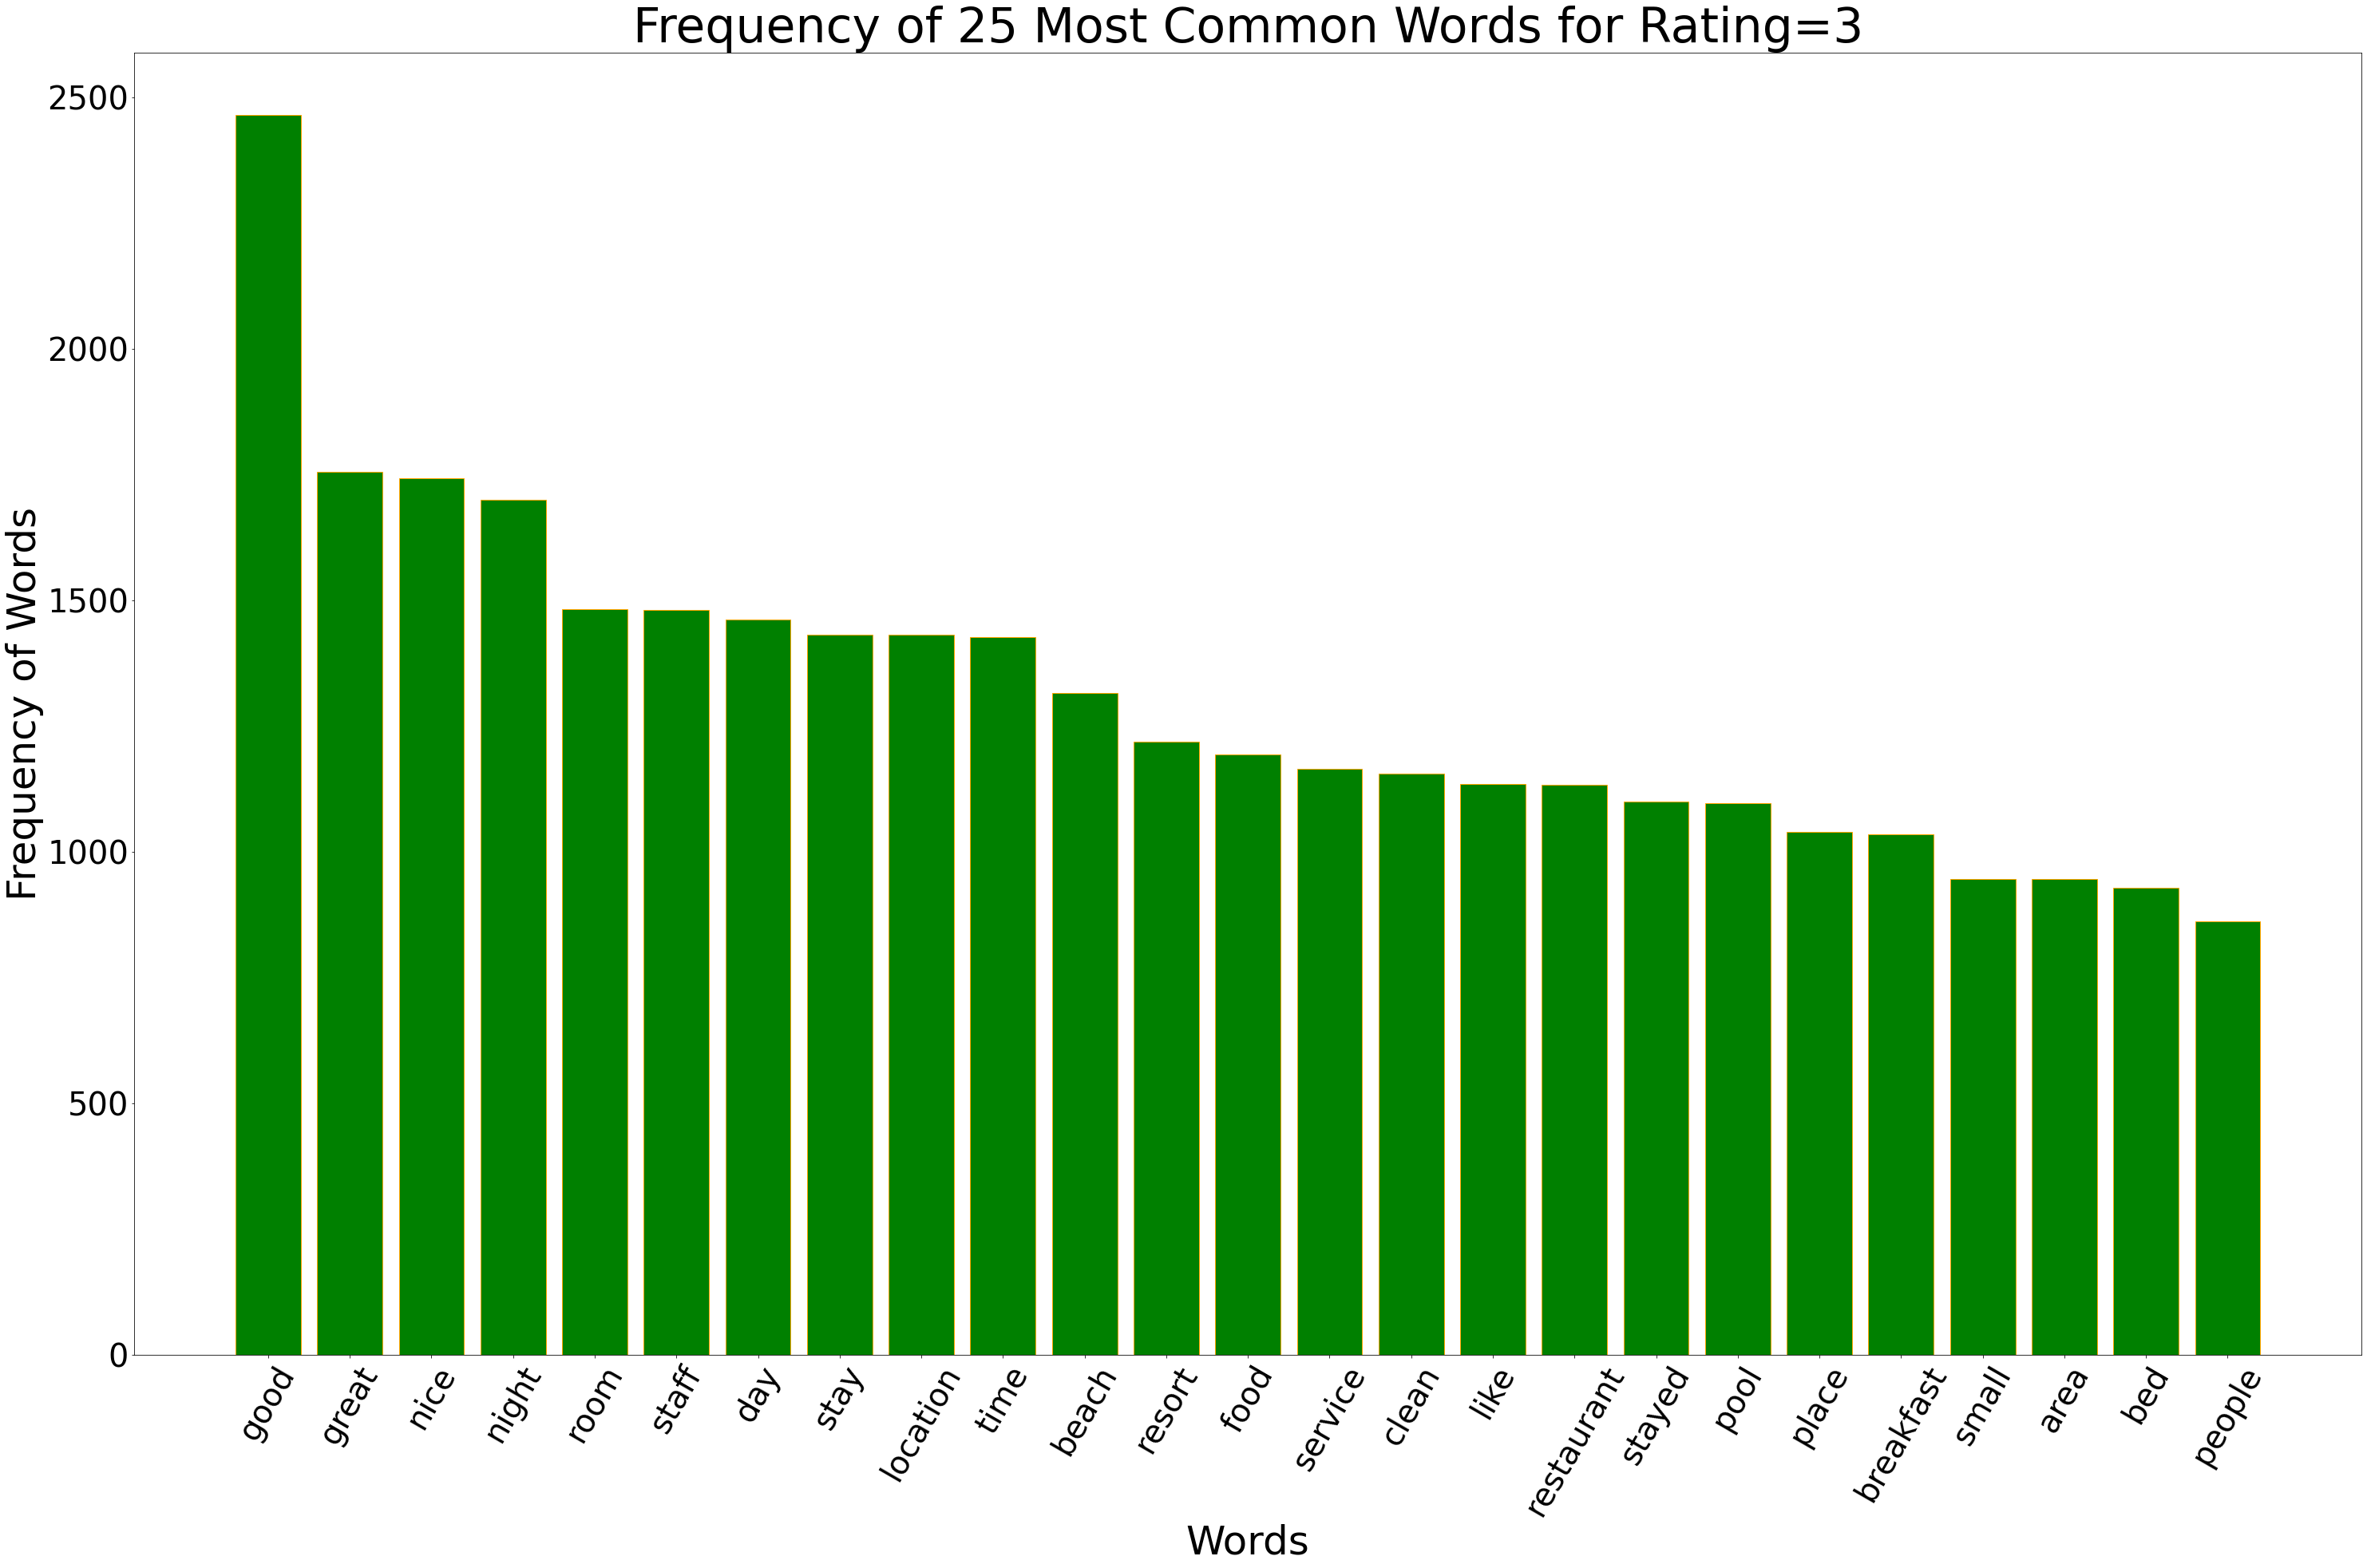

In [40]:
#Most frequent words for rating 3

group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()


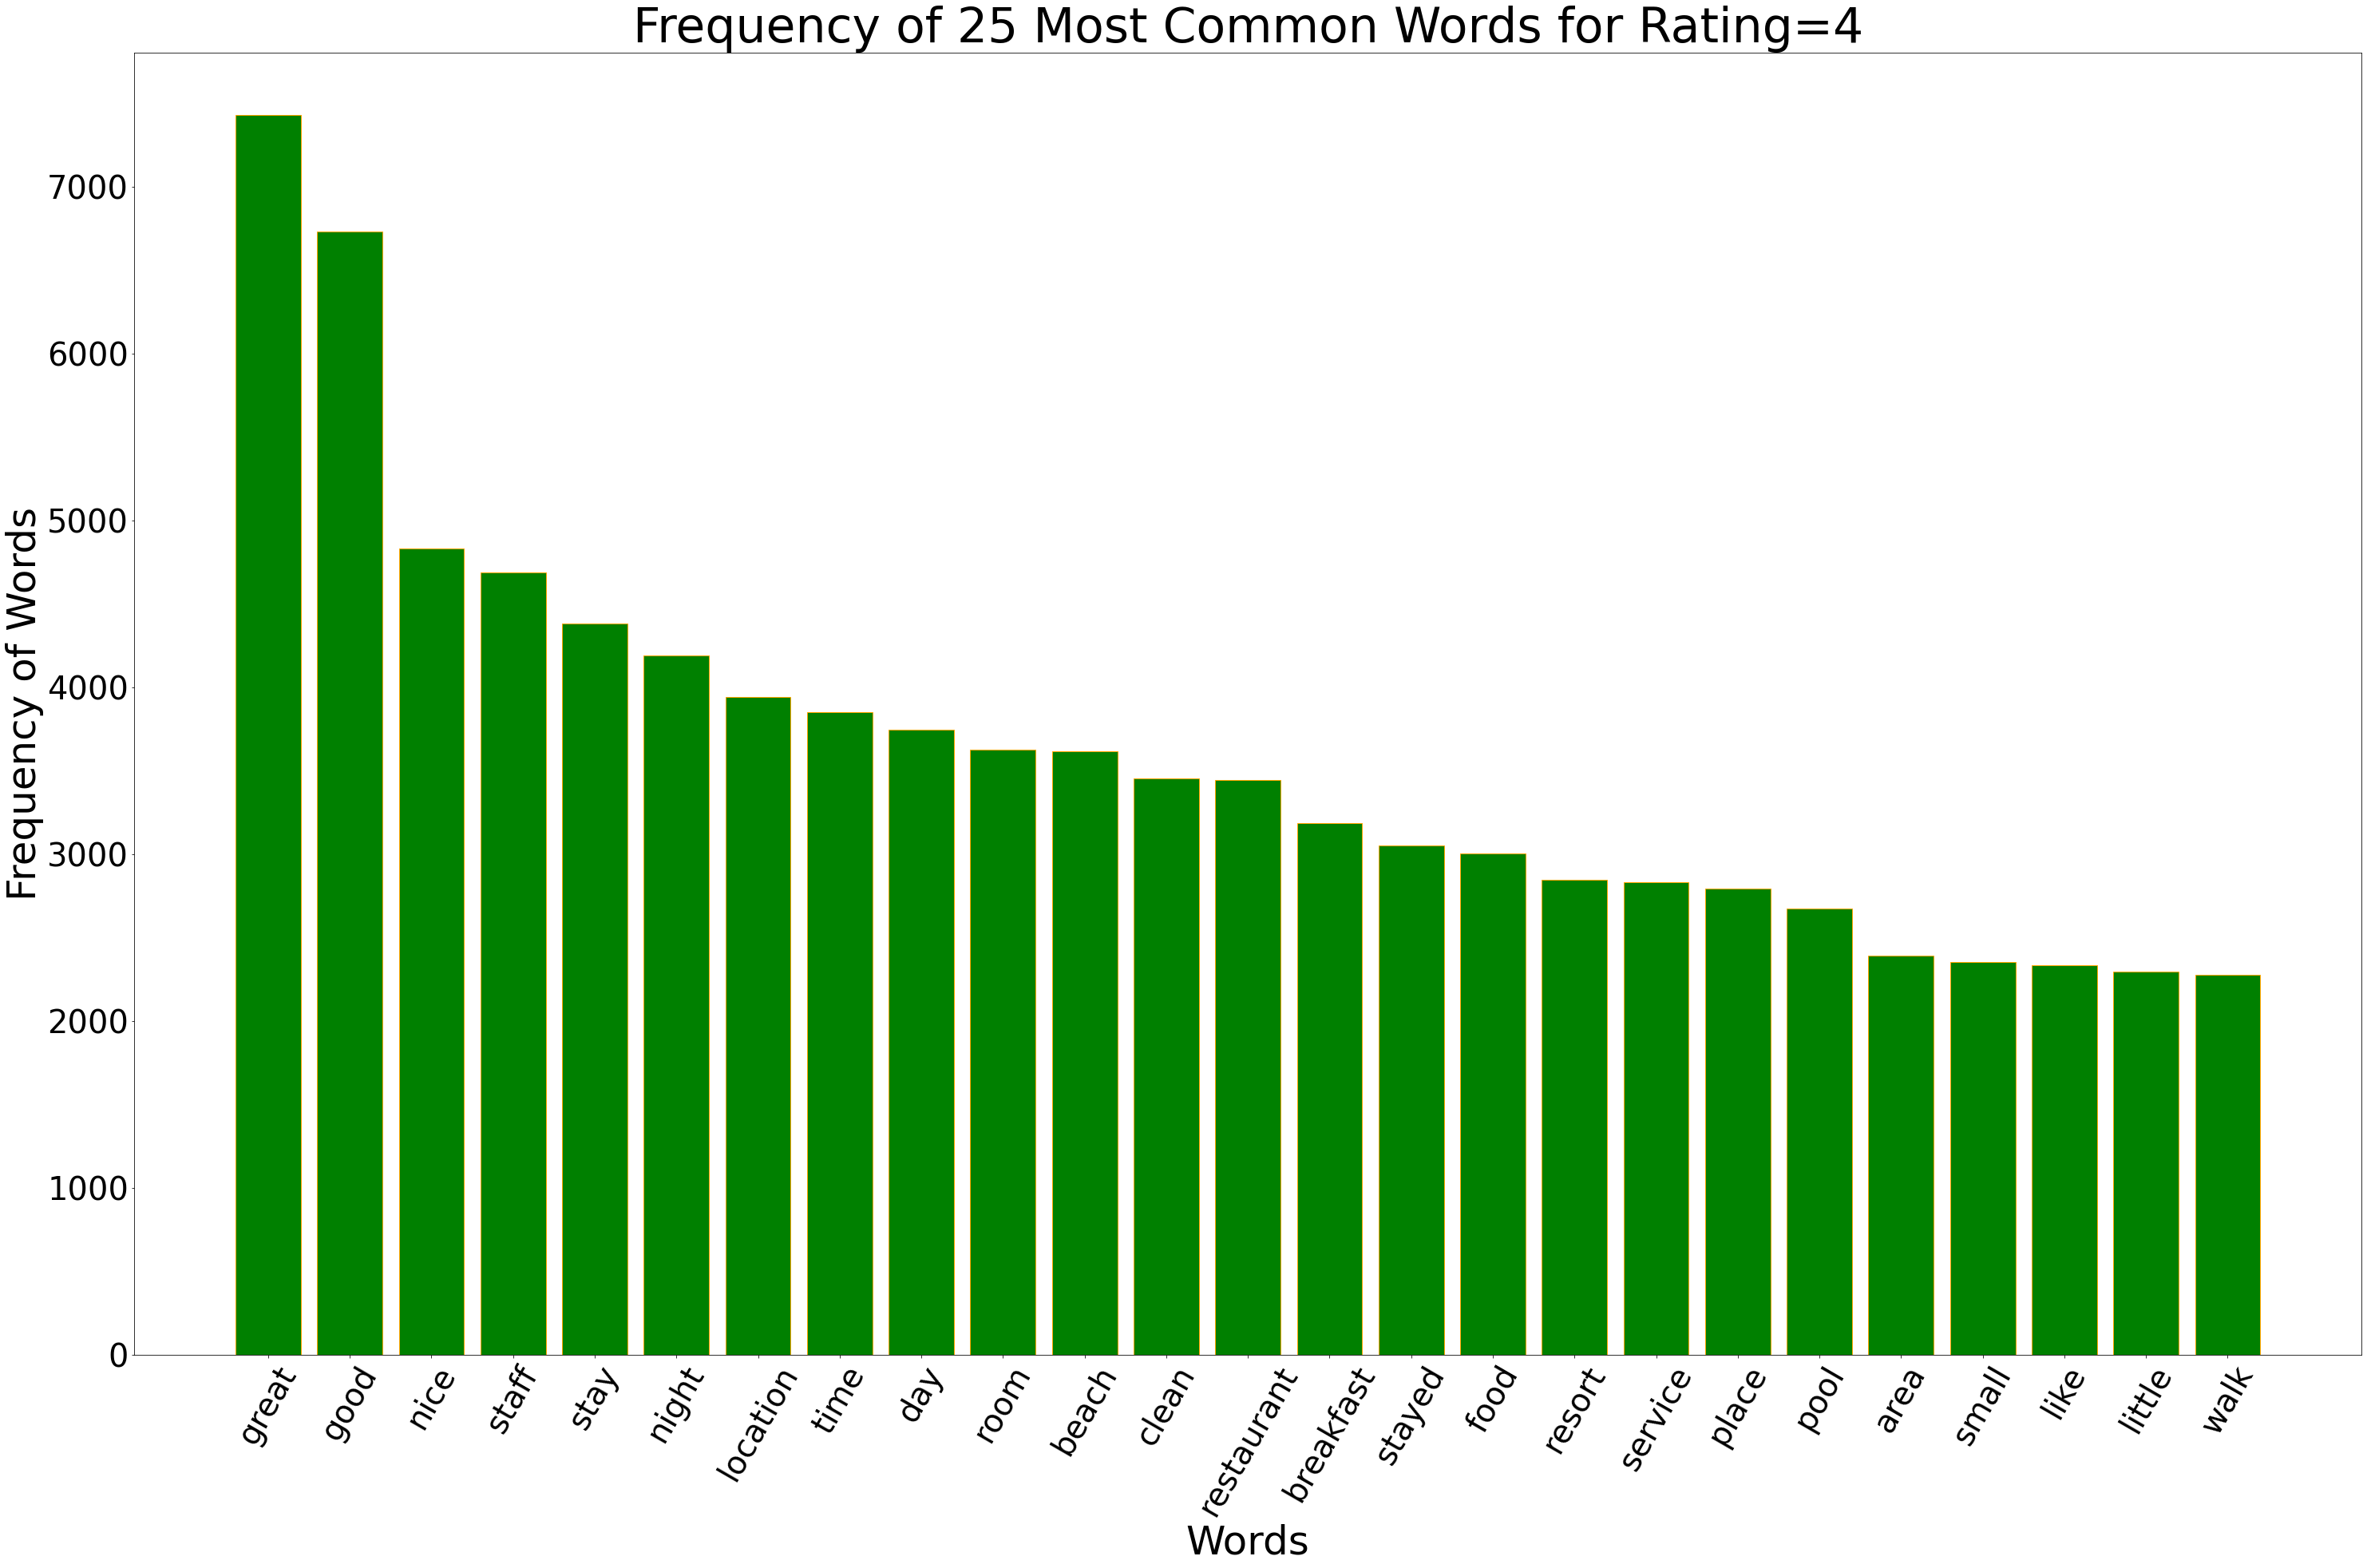

In [41]:
#Most frequent words for rating 4

group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=4', fontsize=60)
plt.show()

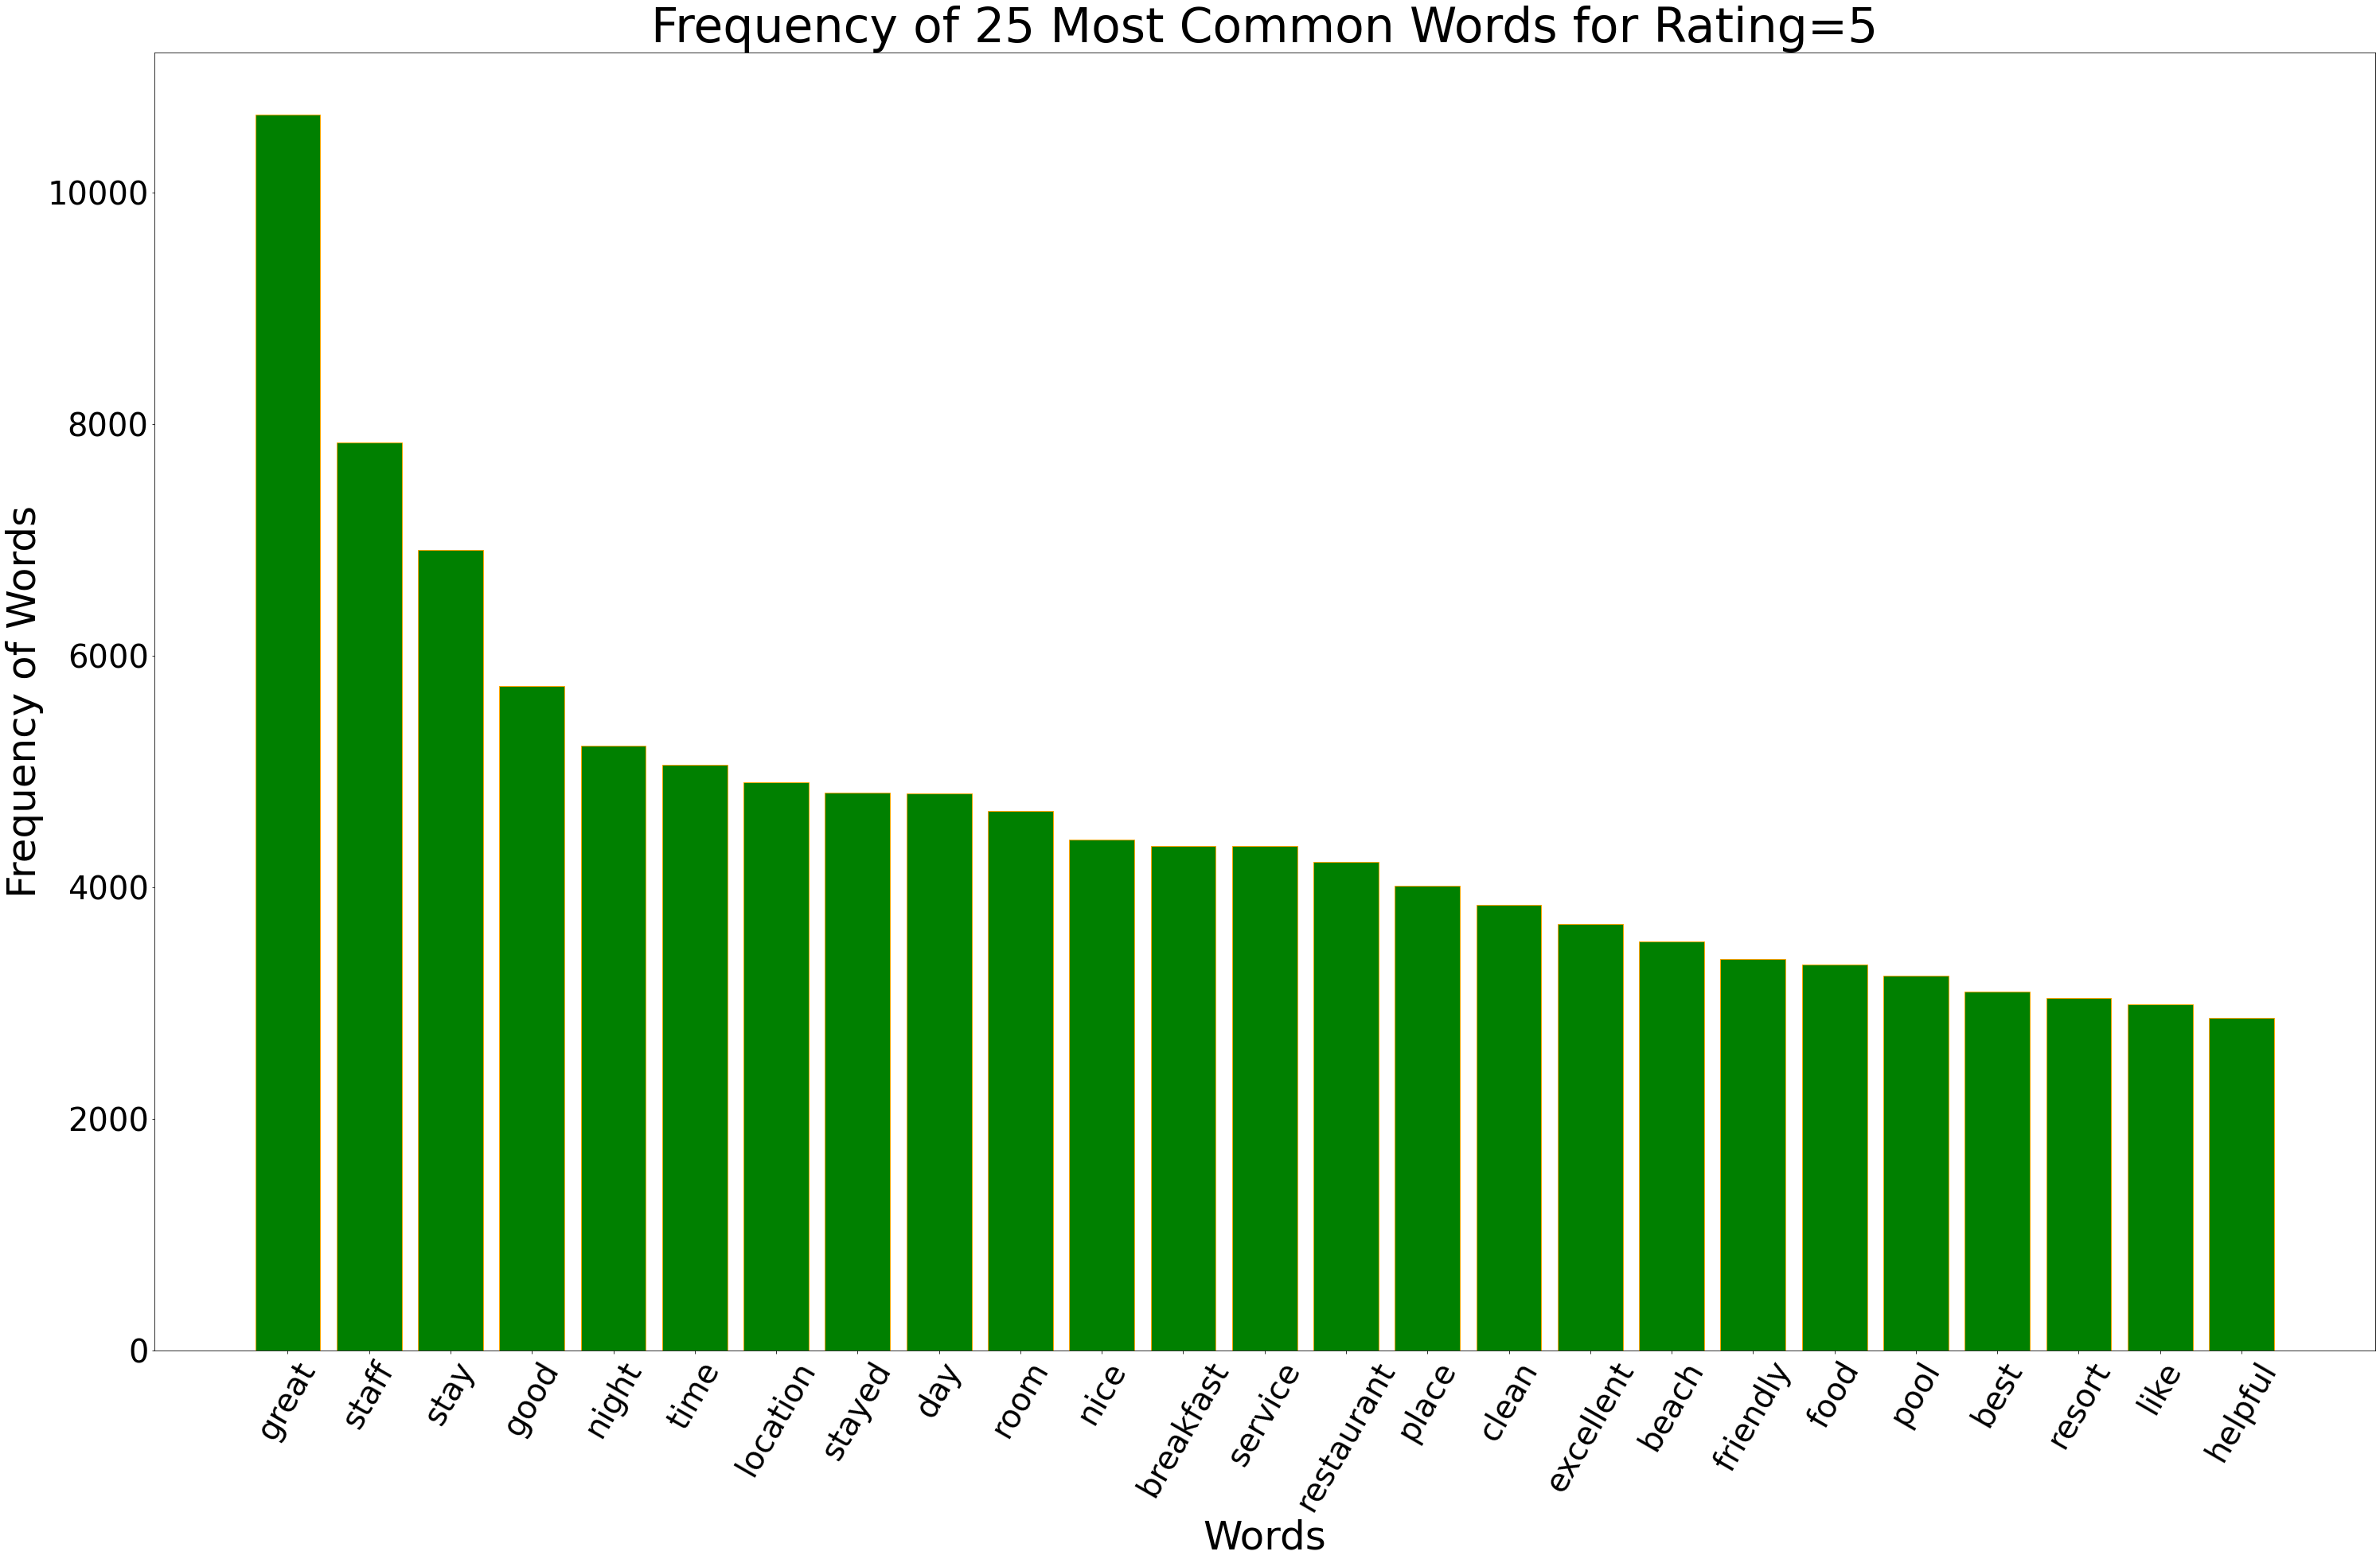

In [42]:
#Most frequent words for rating 5

group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()

In [43]:
#topic modelling using LDA#


In [44]:
import re
import numpy as np
import pandas as pd
from pprint import pprint


In [45]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [46]:
# spacy for lemmatization
import spacy


In [47]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [68]:
conda install -c memex pyldavis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [69]:
#Term Frequency with Count Vetorizer

In [70]:
# Stop word
stop_words_keywords = stopwords.words('english')


In [71]:
# special additioanl stop words added for keyword extraction
stop_words_keywords.extend([
    "will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
    "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
    "put", "pm", "hyatt", "grand", "till", "add", "let", "hotel", "able",
    "per", "st", "couldn", "yet", "par", "hi", "well", "would", "I", "the",
    "s", "also", "great", "get", "like", "take", "thank"
])


In [72]:
# find the most frequent words in the data, extracting information about its content and topics.

In [73]:

from collections import Counter

In [74]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install scikit-learn==0.22.1

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Suneetha\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Suneetha\\AppData\\Local\\Temp\\pip-install-ekvrhoz_\\scikit-learn_d76ca288b20e4648a3af4f0a9132fa5f\\setup.py'"'"'; __file__='"'"'C:\\Users\\Suneetha\\AppData\\Local\\Temp\\pip-install-ekvrhoz_\\scikit-learn_d76ca288b20e4648a3af4f0a9132fa5f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Suneetha\AppData\Local\Temp\pip-wheel-2tqhj4rr'
       cwd: C:\Users\Suneetha\AppData\Local\Temp\pip-install-ekvrhoz_\scikit-learn_d76ca288b20e4648a3af4f0a9132fa5f\
  Complete output (35 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distu


  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\suneetha\anaconda3\lib\site-packages\scikit_learn-1.1.2.dist-info\
   from C:\Users\Suneetha\anaconda3\Lib\site-packages\~cikit_learn-1.1.2.dist-info
  Moving to c:\users\suneetha\anaconda3\lib\site-packages\sklearn\
   from C:\Users\Suneetha\anaconda3\Lib\site-packages\~-learn


        vc_env = _get_vc_env(plat_spec)
      File "C:\Users\Suneetha\anaconda3\lib\site-packages\setuptools\msvc.py", line 316, in msvc14_get_vc_env
        return _msvc14_get_vc_env(plat_spec)
      File "C:\Users\Suneetha\anaconda3\lib\site-packages\setuptools\msvc.py", line 270, in _msvc14_get_vc_env
        raise distutils.errors.DistutilsPlatformError(
    distutils.errors.DistutilsPlatformError: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
    ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\Suneetha\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Suneetha\\AppData\\Local\\Temp\\pip-install-ekvrhoz_\\scikit-learn_d76ca288b20e4648a3af4f0a9132fa5f\\setup.py'"'"'; __file__='"'"'C:\\Users\\Suneetha\\AppData\\Local\\Temp\\pip-install-ekvrhoz_\\scikit-learn_d76ca288b20e4648a3af4f0a

In [81]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [84]:
# Feature Extraction
from sklearn.neighbors import DistanceMetric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [85]:
stops = set(stopwords.words('english') + ['com'])
co = CountVectorizer(stop_words=stop_words_keywords)
counts = co.fit_transform(corpus)
most_freq_terms = pd.DataFrame(counts.sum(axis=0),
                               columns=co.get_feature_names()).T.sort_values(
                                   0, ascending=False).head(25)

<AxesSubplot:title={'center':'Unigram Frequency'}>

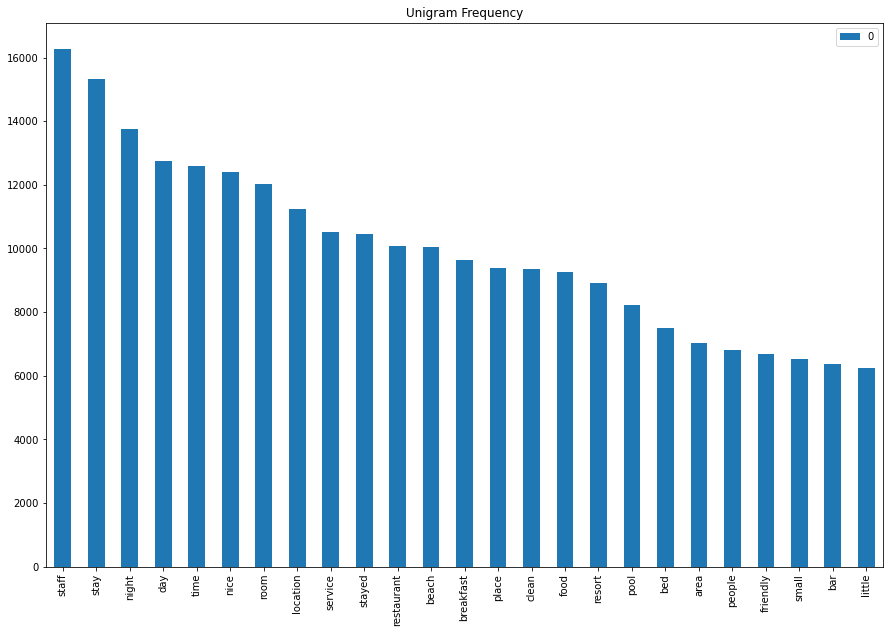

In [86]:
most_freq_terms.plot(kind='bar', title='Unigram Frequency', figsize=(15, 10))


In [87]:
# Now we can check for frequent bi-grams:
co = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
bi_grams = pd.DataFrame(counts1.sum(axis=0),
                        columns=co.get_feature_names()).T.sort_values(
                            0, ascending=False).head(25)


<AxesSubplot:title={'center':'bi-grams'}>

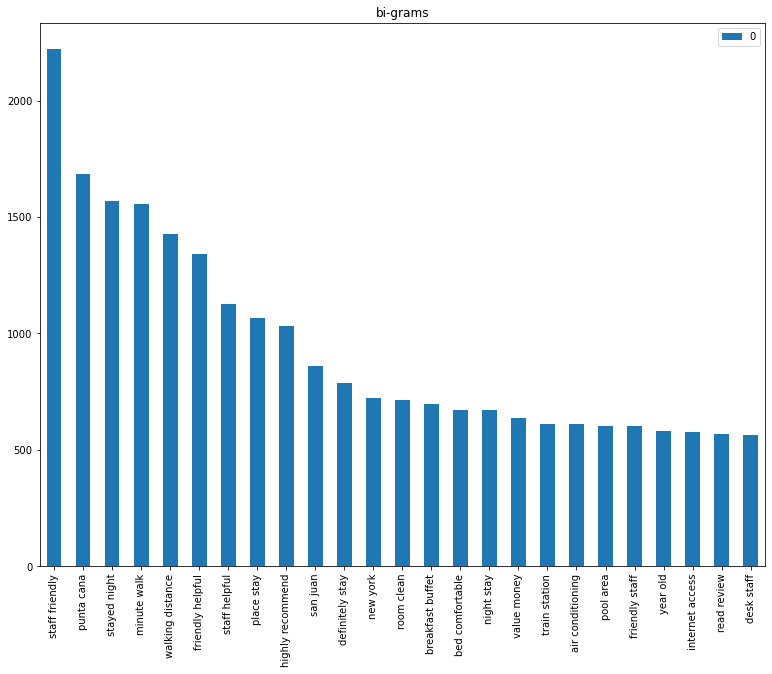

In [88]:
bi_grams.plot(kind='bar', title='bi-grams', figsize=(13, 10))

In [89]:
# Now we can check for frequent tri-grams:
co = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
tri_grams = pd.DataFrame(counts1.sum(axis=0),
                         columns=co.get_feature_names()).T.sort_values(
                             0, ascending=False).head(25)

<AxesSubplot:title={'center':'tri-grams'}>

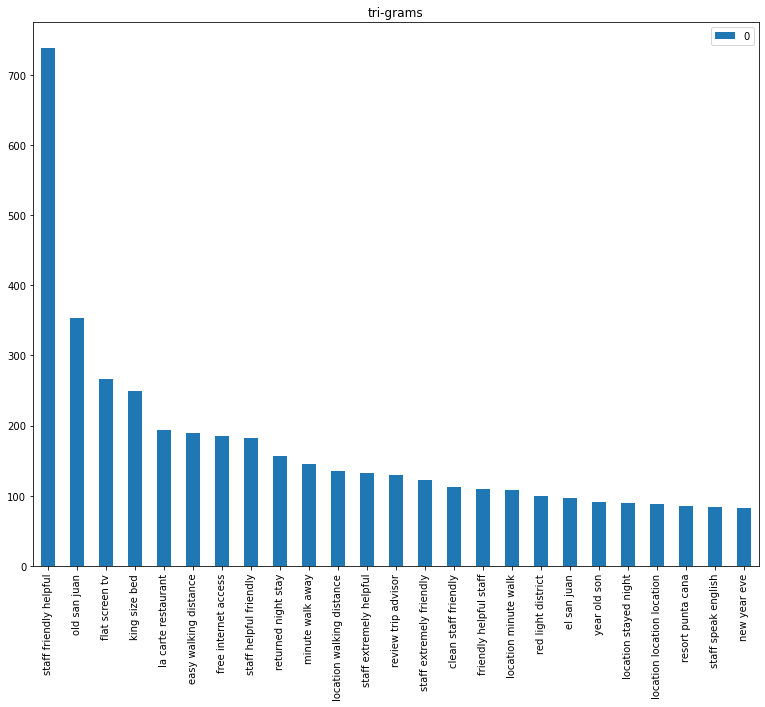

In [90]:
tri_grams.plot(kind='bar', title='tri-grams', figsize=(13, 10))


In [91]:
#Term Frequency with TFIDF


In [92]:
# Converting text into vectors by TFIDF
tfidf2 = TfidfVectorizer(norm="l2",analyzer='word', stop_words=stop_words_keywords,ngram_range=(1,1))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),
                               columns=tfidf2.get_feature_names()).T.sort_values(
                                   0, ascending=False).head(25)

<AxesSubplot:title={'center':'most frequent terms & their frequency'}>

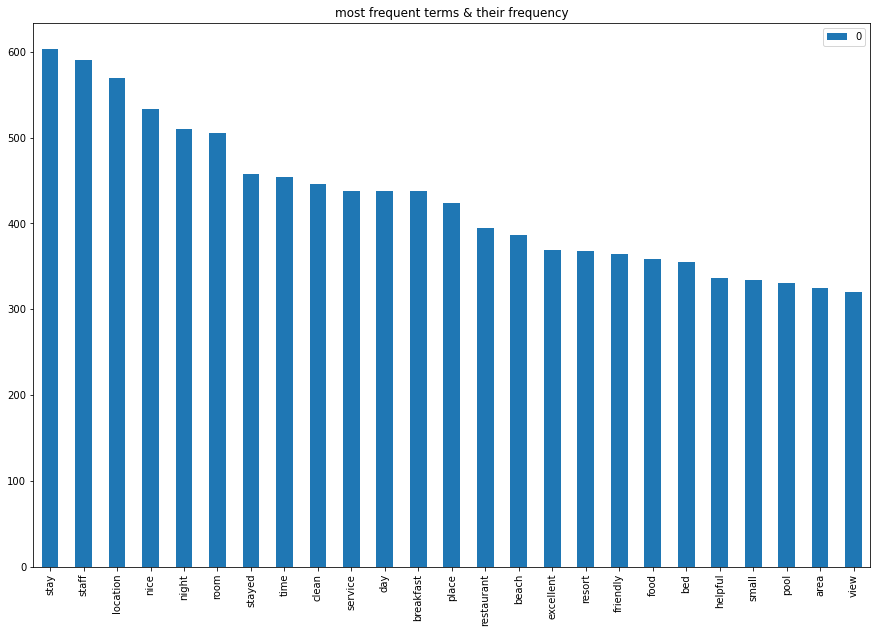

In [93]:
most_freq_terms.plot(kind='bar',
                     title='most frequent terms & their frequency',
                     figsize=(15, 10))


In [94]:
# Now we can check for frequent bi-grams:

tfidf2 = TfidfVectorizer(norm="l2",
                         analyzer='word',
                         stop_words=stop_words_keywords,
                         ngram_range=(2, 2))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(
    tfidf2_x.sum(axis=0),
    columns=tfidf2.get_feature_names()).T.sort_values(0,
                                                      ascending=False).head(25)


<AxesSubplot:title={'center':'Bi-Gram'}>

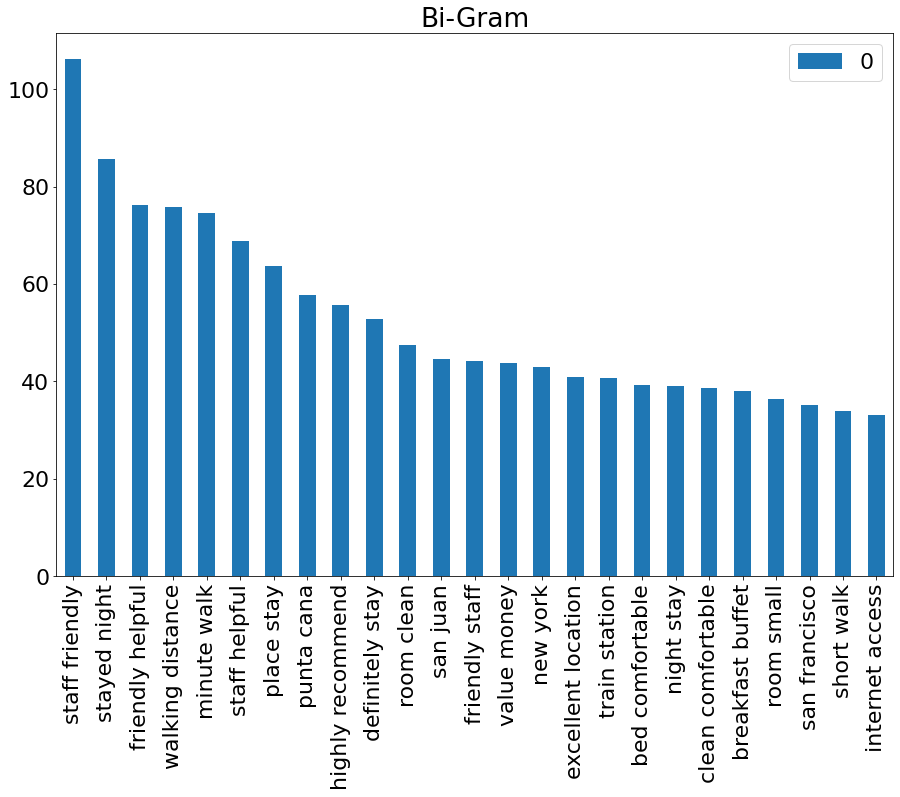

In [95]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Bi-Gram', figsize=(15, 10))

In [96]:
# Now we can check for frequent tri-grams:

tfidf2 = TfidfVectorizer(norm="l2",
                         analyzer='word',
                         stop_words=stop_words_keywords,
                         ngram_range=(3, 3))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(
    tfidf2_x.sum(axis=0),
    columns=tfidf2.get_feature_names()).T.sort_values(0,
                                                      ascending=False).head(25)


<AxesSubplot:title={'center':'Tri-Gram'}>

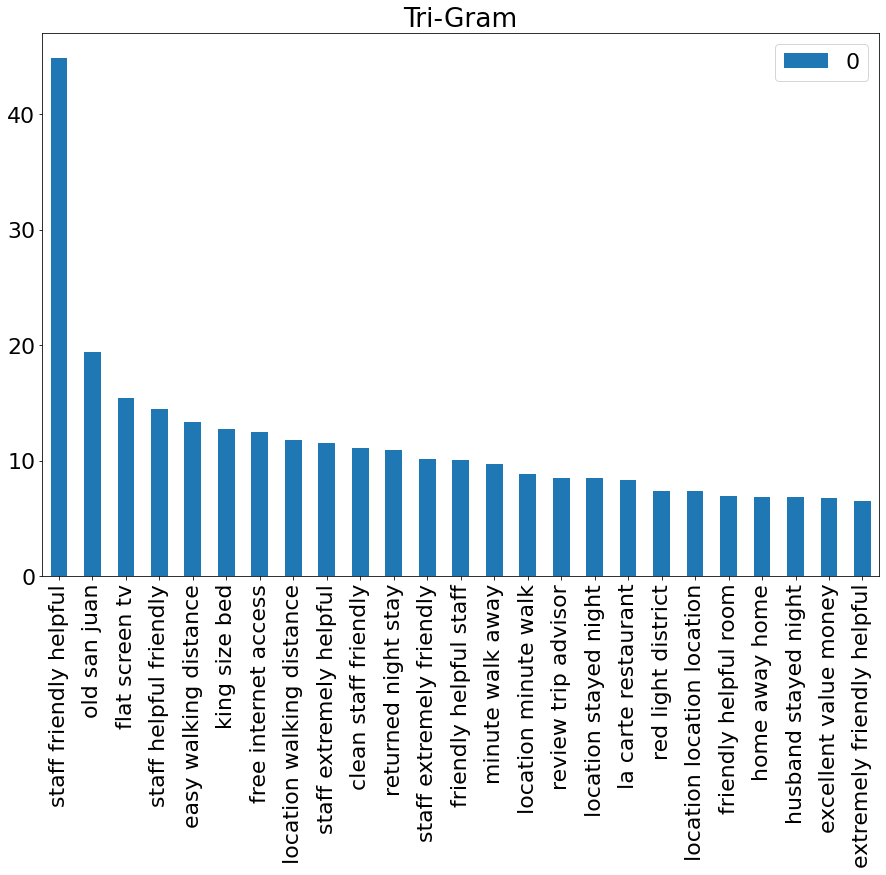

In [97]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Tri-Gram', figsize=(15, 10))


In [98]:
#Important Attribute Extraction from the Reviews
CountVectorizer


sklearn.feature_extraction.text.CountVectorizer

In [99]:
cv2 = CountVectorizer(stop_words=stop_words_keywords,ngram_range=(1,2))
cv2_x = cv2.fit_transform(corpus)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(cv2_x)

TfidfTransformer()

In [125]:
# get feature names
feature_names = cv2.get_feature_names()


In [126]:
# fetch document for which keywords needs to be extracted
doc = corpus[532]


In [127]:
# generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(cv2.transform([doc]))

In [128]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix

In [129]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)


In [130]:
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    

In [ ]:
#Feature extraction by converting text in vector by using TFIDF

In [132]:
tfidf = TfidfVectorizer(max_features=3000,
                       ngram_range=(1,3))


In [133]:
# TFIDF for X-train
corpus_tfidf= tfidf.fit_transform(corpus)


In [134]:
# To save & load models
from pickle import dump
from pickle import load



In [135]:
# save the model to disk
filename = 'model_TFIDF.sav'

In [136]:
dump(tfidf, open('model_TFIDF.sav', 'wb'))
